In [1]:
import os

import numpy as np
import pandas as pd
from IPython.display import display

# Check if the environment is activated
if "CONDA_DEFAULT_ENV" in os.environ:
    print(f"Environment '{os.environ['CONDA_DEFAULT_ENV']}' is activated.")
else:
    print("No specific environment is activated.")

np.random.seed(42)

Environment 'research' is activated.


In [2]:
# # Load the Boston dataset
# dataset = "boston"
# raw_df = pd.read_csv("data/boston.csv")
# target = ["MEDV"]
# features = raw_df.columns.drop(target)
# target, features

In [3]:
# # Load the store sales dataset
# dataset = "store_sales"
# excel_file = pd.ExcelFile("data/store_sales.xlsx")
# sheet_names = excel_file.sheet_names

# # Read the data
# raw_df = pd.read_excel(excel_file, sheet_name=sheet_names[2])  # 2, 9
# iri_key_counts = raw_df["IRI_KEY"].value_counts()
# iri_keys = iri_key_counts[iri_key_counts > 300].index


# target = ["Total.Volume"]
# features = ["F", "D", "Unit.Price"]

# raw_df = raw_df[raw_df["IRI_KEY"] == iri_keys[0]]

# sheet_names, iri_keys

In [4]:
# Load the California housing dataset
from sklearn.datasets import fetch_california_housing

dataset = "california"
housing = fetch_california_housing()
target = housing.target_names
features = housing.feature_names
raw_df = pd.concat(
    [
        pd.DataFrame(housing.data, columns=housing.feature_names),
        pd.DataFrame(housing.target, columns=housing.target_names),
    ],
    axis=1,
)
target, features

(['MedHouseVal'],
 ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'])

In [5]:
# # Load the soybean dataset
# dataset = "soybean"
# raw_df = pd.read_excel("data/soybean.xlsx")
# # X = raw_df.values[:-1, [5, 6, 15, 16, 17, 26,
# #                         34, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]  # 9 check yield 12 rm band
# # y = raw_df.values[:-1, 11]
# X = raw_df.iloc[:-1, [5, 6, 15, 16, 17, 26,
#                   34, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]
# y = raw_df.iloc[:-1, [11]]
# X.shape, y.shape

In [6]:
# # Load LengthOfStay
# dataset = "LengthOfStay"
# raw_df = pd.read_csv("data/LengthOfStay.csv")
# raw_df = raw_df.drop(columns=["eid", "vdate", "discharged"])
# target = ["lengthofstay"]
# features = raw_df.columns.drop(target)
# target, features

In [7]:
# # Load HospitalStay
# dataset = "HospitalStay"
# raw_df = pd.read_csv("data/Healthcare_Investments_and_Hospital_Stay.csv")
# target = ["Hospital_Stay"]
# features = raw_df.columns.drop(target)
# target, features

In [8]:
import time

output_folder = f"output/{dataset}_{time.strftime('%F_%T')}"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
if not os.path.exists(f"{output_folder}/models"):
    os.makedirs(f"{output_folder}/models")

X = raw_df[features]
y = raw_df[target]

display(f"output: {output_folder}", X.describe(), y.describe())

'output: output/california_2025-03-11_17:19:56'

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -121.800000  
50%        2.818116     34.260000   -118.490000  
75%        3.282261     37.710000   -118.010000  
max     1243.333333     41.950000   -114.310000

MedHouseVal
count  20640.000000
mean       2.068558
std        1.153956
min        0.149990
25%        1.196000
50%        1.797000
75%        2.647250
max        5.000010

In [9]:
# # Remove Outliers
# def remove_outliers(df, threshold=3):
#     z_scores = np.abs((df - df.mean()) / df.std())
#     return df[(z_scores < threshold).all(axis=1)]
# filtered_train_data = train_data
# for col in train_data.columns:
#     value_counts = train_data[col].value_counts().sort(by="count")
#     valid = value_counts.filter(pl.col("count") > value_counts["count"].max()/len(value_counts))[col]
#     filtered_train_data = filtered_train_data.filter(pl.col(col).is_in(valid))
# display(filtered_train_data, filtered_train_data.describe())

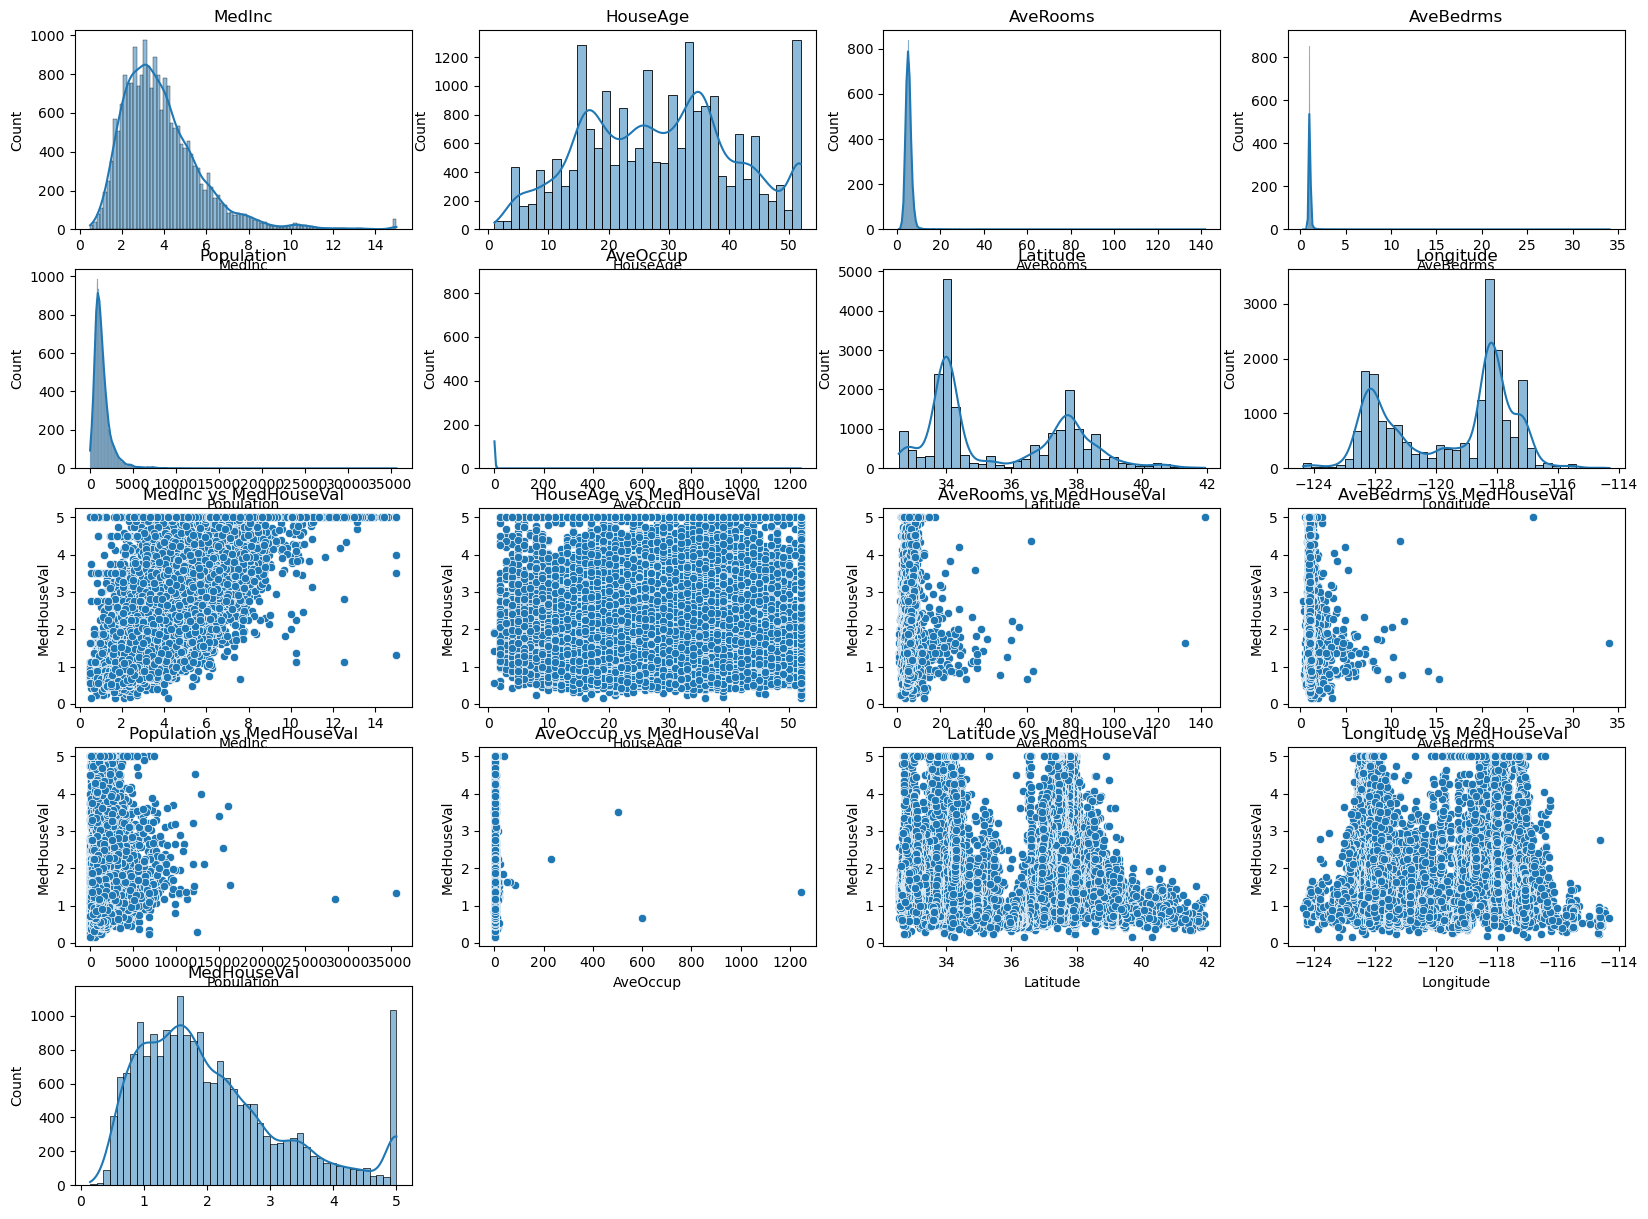

In [10]:
# Plot data
import matplotlib.pyplot as plt
import seaborn as sns


def plot_data(X, y, cols=4):
    fig, axs = plt.subplots(
        (X.shape[1]+X.shape[1]*y.shape[1] + y.shape[1]+cols-1)//cols, cols, figsize=(20, 15))
    axs = axs.flatten()

    a = 0
    for i, col in enumerate(X.columns):
        data = X[col].to_numpy()
        ax = axs[a+i]
        sns.histplot(data, kde=True, ax=ax)
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.tick_params(axis="both", which="major")
        ax.tick_params(axis="both", which="minor")
    a += i + 1
    for i, col in enumerate(X.columns):
        data = X[col].to_numpy()
        for j, ycol in enumerate(y.columns):
            ax = axs[a+i+j*y.shape[1]]
            sns.scatterplot(x=data, y=y[ycol], ax=ax)
            ax.set_title(f"{col} vs {ycol}")
            ax.set_xlabel(col)
            ax.set_ylabel(ycol)
    a += i + 1
    for i, col in enumerate(y.columns):
        data = y[col].to_numpy()
        ax = axs[a+i]
        sns.histplot(data, kde=True, ax=ax)
        ax.set_title(col)
    a += i+1
    for j in range(a, len(axs)):
        fig.delaxes(axs[j])

    # fig.tight_layout()
    return fig
    
fig = plot_data(X, y)
fig.savefig(f"{output_folder}/data.png")
fig.show()

In [11]:
# Define search
from optuna.integration.sklearn import OptunaSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    TargetEncoder,
)

CATEGORICAL_PREPROCESSORS = {
    "drop": "drop",
    "ordinal": OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
    "one_hot": OneHotEncoder(
        handle_unknown="ignore", max_categories=20, sparse_output=False
    ),
    "target": TargetEncoder(target_type="continuous"),
}

SCALERS = {
    "identity": None,
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "quantile": QuantileTransformer(),
}

search_params = {
    "cv": 5,
    "n_jobs": -1,  # -1,
    "n_trials": 5, # 1
    # "n_trials": None,
    "random_state": 42,
    "return_train_score": True,
    "scoring": "neg_mean_squared_error",  # r2
    # "timeout": 10,
    # "timeout": None,
    "verbose": 0,
}


def search(
    model,
    param_grid={},
    categorical_preprocessor="drop",
    scaler="identity",
    search_params=search_params,
):
    search_params = search_params.copy()
    # search_params["n_trials"] = int(4**len(param_grid))

    numerical_features = X.select_dtypes(include=["number"]).columns
    categorical_features = X.select_dtypes(include=["object", "category"]).columns
    preprocessor = ColumnTransformer(
        [
            ("numerical", "passthrough", numerical_features),
            (
                "categorical",
                CATEGORICAL_PREPROCESSORS[categorical_preprocessor],
                categorical_features,
            ),
        ]
    )

    return OptunaSearchCV(
        Pipeline(
            [
                ("categorical_preprocessor", preprocessor),
                ("scaler", SCALERS[scaler]),
                ("model", model),
            ]
        ),
        {f"model__{k}": v for k, v in param_grid.items()},
        **search_params,
    )

In [12]:
# Define search grids
from optuna.distributions import (
    CategoricalDistribution,
    FloatDistribution,
    IntDistribution,
)

mlp_sk_param_grid = {
    "learning_rate_init": FloatDistribution(1e-2, 1e-1, log=True),
    "max_iter": IntDistribution(100, 100, log=True),
    "early_stopping": CategoricalDistribution([False]),
    "n_iter_no_change": IntDistribution(100, 100),
}

mlp_TrANN_param_grid = {
    "learning_rate_init": FloatDistribution(1e-2, 1e-1, log=True),
    "max_iter": IntDistribution(200, 200, log=True),
}

In [13]:
# from models import MLP, FONN1, FONN2, TREENN1, TREENN2
from models.models_sklearn import (
    Tree,
    Ensemble,
    MLP as MLP_sk,
    FONN1 as FONN1_sk,
    FONN2 as FONN2_sk,
    TREENN1 as TREENN1_sk,
    TREENN2 as TREENN2_sk,
)
from models.models_TrANN import (
    FONN1 as FONN1_TrANN,
    FONN2 as FONN2_TrANN,
    FONN3 as FONN3_TrANN,
    TREENN1 as TREENN1_TrANN,
    TREENN2 as TREENN2_TrANN,
    TREENN3 as TREENN3_TrANN,
)

models = {}

num_trees_input = 5
num_trees_hidden = 5
hidden_nodes = [10]
# hidden_nodes = [5, 10]

# categorical_preprocessor = ["drop", "target"]
# scalers = ["identity", "standard"]
scalers = ["identity"]
categorical_preprocessor = ["drop"]

models["Tree"] = search(Tree())
for hn in hidden_nodes:
    models[f"Ensemble_sk {hn}"] = search(Ensemble(hn))
    for c in categorical_preprocessor:
        for s in scalers:
            sk_args = (mlp_sk_param_grid, c, s)
            trann_args = (mlp_TrANN_param_grid, c, s)
            models[f"MLP_sk_{c}_{s} {hn}"] = search(MLP_sk(hn), *sk_args)
            models[f"FONN1_sk_{c}_{s} {num_trees_input} {hn}"] = search(
                FONN1_sk(num_trees_input, num_trees_input + hn), *sk_args
            )
            models[f"FONN2_sk_{c}_{s} {num_trees_hidden} {hn}"] = search(
                FONN2_sk(num_trees_hidden, num_trees_hidden + hn), *sk_args
            )
            models[f"TREENN1_sk_{c}_{s} {hn}"] = search(
                TREENN1_sk(1 + hn), *sk_args
            )
            models[f"TREENN2_sk_{c}_{s} {hn}"] = search(
                TREENN2_sk(1 + hn), *sk_args
            )
            models[f"FONN1_TrANN_{c}_{s} {num_trees_input} {hn}"] = search(
                FONN1_TrANN(hn, num_trees_input), *trann_args
            )
            models[f"FONN2_TrANN_{c}_{s} {num_trees_hidden} {hn}"] = search(
                FONN2_TrANN(hn, num_trees_hidden), *trann_args
            )
            models[f"FONN3_TrANN_{c}_{s} {num_trees_hidden} {hn}"] = search(
                FONN3_TrANN(hn, num_trees_hidden), *trann_args
            )
            models[f"TREENN1_TrANN_{c}_{s} {hn}"] = search(
                TREENN1_TrANN(hn), *trann_args
            )
            models[f"TREENN2_TrANN_{c}_{s} {hn}"] = search(
                TREENN2_TrANN(hn), *trann_args
            )
            models[f"TREENN3_TrANN_{c}_{s} {hn}"] = search(
                TREENN3_TrANN(hn), *trann_args
            )

display(models)

/tmp/ipykernel_74440/2285695493.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_74440/2285695493.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_74440/2285695493.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_74440/2285695493.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_74440/2285695493.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_74440/2285695493.py:69: ExperimentalWarning: OptunaSearchCV is experimental

{'Tree': OptunaSearchCV(cv=5,
                estimator=Pipeline(steps=[('categorical_preprocessor',
                                           ColumnTransformer(transformers=[('numerical',
                                                                            'passthrough',
                                                                            Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
        'Latitude', 'Longitude'],
       dtype='object')),
                                                                           ('categorical',
                                                                            'drop',
                                                                            Index([], dtype='object'))])),
                                          ('scaler', None), ('model', Tree())]),
                n_jobs=-1, n_trials=5, param_distributions={}, random_state=42,
                return_train_score=True, scoring='neg_mean_sq

In [14]:
from sklearn.metrics import mean_squared_error

# Train and evaluate models
cv_results = {}
results = []

result_columns = [
    "model",
    "mean_fit_time",
    "mean_score_time",
    "mean_train_score",
    "mean_test_score",
    "mse",
]


def fit_model(name, model, X, y):
    print(f"Fitting {name}...")
    model.fit(X, y.to_numpy().ravel())
    result = model.cv_results_
    cv_results[name] = result
    return {
        "model": name,
        **{col: result[col][model.best_index_] for col in result},
        "mse": mean_squared_error(y, model.predict(X)),
        "params": str(model.best_params_),
    }


for name, model in models.items():
    results.append(fit_model(name, model, X, y))

results = pd.DataFrame(results)
results = results[result_columns]
results.to_csv(f"{output_folder}/results.csv", index=False)

[I 2025-03-11 17:20:55,050] A new study created in memory with name: no-name-ab3dbee4-0328-432f-8697-093a6d4740c1


Fitting Tree...


[I 2025-03-11 17:20:55,908] Trial 2 finished with value: -0.8860379116737402 and parameters: {}. Best is trial 2 with value: -0.8860379116737402.
[I 2025-03-11 17:20:55,930] Trial 1 finished with value: -0.8142442540788372 and parameters: {}. Best is trial 1 with value: -0.8142442540788372.
[I 2025-03-11 17:20:55,957] Trial 3 finished with value: -1.005222039041085 and parameters: {}. Best is trial 1 with value: -0.8142442540788372.
[I 2025-03-11 17:20:55,988] Trial 0 finished with value: -0.8410106966497238 and parameters: {}. Best is trial 1 with value: -0.8142442540788372.
[I 2025-03-11 17:20:55,996] Trial 4 finished with value: -0.9210291671542199 and parameters: {}. Best is trial 1 with value: -0.8142442540788372.
[I 2025-03-11 17:20:56,200] A new study created in memory with name: no-name-b9fca4d4-5b89-4b99-9826-4f8c9c0b818c


Fitting Ensemble_sk 10...


[I 2025-03-11 17:21:03,740] Trial 0 finished with value: -0.47373408105165477 and parameters: {}. Best is trial 0 with value: -0.47373408105165477.
[I 2025-03-11 17:21:04,095] Trial 4 finished with value: -0.4578535201316015 and parameters: {}. Best is trial 4 with value: -0.4578535201316015.
[I 2025-03-11 17:21:04,257] Trial 2 finished with value: -0.4692262068386296 and parameters: {}. Best is trial 4 with value: -0.4578535201316015.
[I 2025-03-11 17:21:04,429] Trial 1 finished with value: -0.47451506653794595 and parameters: {}. Best is trial 4 with value: -0.4578535201316015.
[I 2025-03-11 17:21:04,515] Trial 3 finished with value: -0.4780815430211394 and parameters: {}. Best is trial 4 with value: -0.4578535201316015.
[I 2025-03-11 17:21:06,413] A new study created in memory with name: no-name-5668099d-2861-4e26-bedb-442fc4ac7596


Fitting MLP_sk_drop_identity 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Fitting FONN1_sk_drop_identity 5 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Fitting FONN2_sk_drop_identity 5 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Fitting TREENN1_sk_drop_identity 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Fitting TREENN2_sk_drop_identity 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Fitting FONN1_TrANN_drop_identity 5 10...


[I 2025-03-11 17:40:20,965] Trial 0 finished with value: -1.3754660828186958 and parameters: {'model__learning_rate_init': 0.09326599260088235, 'model__max_iter': 200}. Best is trial 0 with value: -1.3754660828186958.
[I 2025-03-11 17:40:21,796] Trial 2 finished with value: -1.3794331695223776 and parameters: {'model__learning_rate_init': 0.01369612760020452, 'model__max_iter': 200}. Best is trial 0 with value: -1.3754660828186958.
[I 2025-03-11 17:40:22,071] Trial 3 finished with value: -1.4201513491218098 and parameters: {'model__learning_rate_init': 0.012286628350492376, 'model__max_iter': 200}. Best is trial 0 with value: -1.3754660828186958.
[I 2025-03-11 17:40:22,545] Trial 4 finished with value: -1.3785043386806246 and parameters: {'model__learning_rate_init': 0.09231741041701516, 'model__max_iter': 200}. Best is trial 0 with value: -1.3754660828186958.
[I 2025-03-11 17:40:23,050] Trial 1 finished with value: -1.3824705487840265 and parameters: {'model__learning_rate_init': 0.01

Fitting FONN2_TrANN_drop_identity 5 10...


[I 2025-03-11 17:41:13,206] Trial 1 finished with value: -0.6670448050232998 and parameters: {'model__learning_rate_init': 0.011605375505961243, 'model__max_iter': 200}. Best is trial 1 with value: -0.6670448050232998.
[I 2025-03-11 17:41:13,384] Trial 2 finished with value: -0.6631512913310398 and parameters: {'model__learning_rate_init': 0.08226320709503757, 'model__max_iter': 200}. Best is trial 2 with value: -0.6631512913310398.
[I 2025-03-11 17:41:13,512] Trial 4 finished with value: -0.6651083985137252 and parameters: {'model__learning_rate_init': 0.015178206370204025, 'model__max_iter': 200}. Best is trial 2 with value: -0.6631512913310398.
[I 2025-03-11 17:41:13,531] Trial 0 finished with value: -0.6692860535010083 and parameters: {'model__learning_rate_init': 0.03400231544335232, 'model__max_iter': 200}. Best is trial 2 with value: -0.6631512913310398.
[I 2025-03-11 17:41:13,627] Trial 3 finished with value: -0.6763806374728597 and parameters: {'model__learning_rate_init': 0.0

Fitting FONN3_TrANN_drop_identity 5 10...


[I 2025-03-11 17:41:58,684] Trial 4 finished with value: -3.5403118674754297 and parameters: {'model__learning_rate_init': 0.08933985282230208, 'model__max_iter': 200}. Best is trial 4 with value: -3.5403118674754297.
[I 2025-03-11 17:41:59,546] Trial 1 finished with value: -3.549052021740608 and parameters: {'model__learning_rate_init': 0.03044203814064298, 'model__max_iter': 200}. Best is trial 4 with value: -3.5403118674754297.
[I 2025-03-11 17:42:00,037] Trial 2 finished with value: -3.5368670569576763 and parameters: {'model__learning_rate_init': 0.0812988332031407, 'model__max_iter': 200}. Best is trial 2 with value: -3.5368670569576763.
[I 2025-03-11 17:42:00,055] Trial 3 finished with value: -3.558206623404536 and parameters: {'model__learning_rate_init': 0.06821459022584025, 'model__max_iter': 200}. Best is trial 2 with value: -3.5368670569576763.
[I 2025-03-11 17:42:00,264] Trial 0 finished with value: -3.507412081127407 and parameters: {'model__learning_rate_init': 0.0714840

Fitting TREENN1_TrANN_drop_identity 10...


[I 2025-03-11 17:42:30,587] Trial 0 finished with value: -1.3992203765087141 and parameters: {'model__learning_rate_init': 0.01664686996085558, 'model__max_iter': 200}. Best is trial 0 with value: -1.3992203765087141.
[I 2025-03-11 17:42:30,698] Trial 2 finished with value: -1.3780750673442297 and parameters: {'model__learning_rate_init': 0.09895311816410621, 'model__max_iter': 200}. Best is trial 2 with value: -1.3780750673442297.
[I 2025-03-11 17:42:30,854] Trial 1 finished with value: -1.3826868822536933 and parameters: {'model__learning_rate_init': 0.062357772185381515, 'model__max_iter': 200}. Best is trial 2 with value: -1.3780750673442297.
[I 2025-03-11 17:42:31,006] Trial 3 finished with value: -1.3912120772355663 and parameters: {'model__learning_rate_init': 0.013382891590249761, 'model__max_iter': 200}. Best is trial 2 with value: -1.3780750673442297.
[I 2025-03-11 17:42:31,101] Trial 4 finished with value: -1.3830300182515887 and parameters: {'model__learning_rate_init': 0.0

Fitting TREENN2_TrANN_drop_identity 10...


[I 2025-03-11 17:43:06,760] Trial 2 finished with value: -0.7473235180253482 and parameters: {'model__learning_rate_init': 0.04204614775620992, 'model__max_iter': 200}. Best is trial 2 with value: -0.7473235180253482.
[I 2025-03-11 17:43:07,217] Trial 1 finished with value: -0.704735544162323 and parameters: {'model__learning_rate_init': 0.05500014634710251, 'model__max_iter': 200}. Best is trial 1 with value: -0.704735544162323.
[I 2025-03-11 17:43:07,734] Trial 3 finished with value: -0.7096290424053633 and parameters: {'model__learning_rate_init': 0.06625003787362631, 'model__max_iter': 200}. Best is trial 1 with value: -0.704735544162323.
[I 2025-03-11 17:43:07,818] Trial 0 finished with value: -0.7022583329770873 and parameters: {'model__learning_rate_init': 0.07642600091271495, 'model__max_iter': 200}. Best is trial 0 with value: -0.7022583329770873.
[I 2025-03-11 17:43:07,831] Trial 4 finished with value: -0.730132301305344 and parameters: {'model__learning_rate_init': 0.0143765

Fitting TREENN3_TrANN_drop_identity 10...


[I 2025-03-11 17:43:37,214] Trial 1 finished with value: -0.7416272258920795 and parameters: {'model__learning_rate_init': 0.013757706714525416, 'model__max_iter': 200}. Best is trial 1 with value: -0.7416272258920795.
[I 2025-03-11 17:43:37,991] Trial 0 finished with value: -0.766121501848511 and parameters: {'model__learning_rate_init': 0.012562513725060703, 'model__max_iter': 200}. Best is trial 1 with value: -0.7416272258920795.
[I 2025-03-11 17:43:38,500] Trial 3 finished with value: -0.7326871556562443 and parameters: {'model__learning_rate_init': 0.0913951746276563, 'model__max_iter': 200}. Best is trial 3 with value: -0.7326871556562443.
[I 2025-03-11 17:43:38,623] Trial 2 finished with value: -0.749260378620093 and parameters: {'model__learning_rate_init': 0.010499733439828105, 'model__max_iter': 200}. Best is trial 3 with value: -0.7326871556562443.
[I 2025-03-11 17:43:39,125] Trial 4 finished with value: -0.7390126995096591 and parameters: {'model__learning_rate_init': 0.065

In [15]:
display(
    results,
    results.sort_values(by="mean_test_score", ascending=False),
    results.sort_values(by="mean_train_score", ascending=False),
    results.sort_values(by="mse", ascending=True),
)

model  mean_fit_time  mean_score_time  \
0                             Tree       0.163504         0.002864   
1                   Ensemble_sk 10       1.533800         0.009432   
2          MLP_sk_drop_identity 10      26.022697         0.012344   
3      FONN1_sk_drop_identity 5 10      38.096159         0.037564   
4      FONN2_sk_drop_identity 5 10      80.619101         0.007536   
5      TREENN1_sk_drop_identity 10      27.227083         0.014409   
6      TREENN2_sk_drop_identity 10      40.067316         0.009273   
7   FONN1_TrANN_drop_identity 5 10      10.972553         0.024210   
8   FONN2_TrANN_drop_identity 5 10       9.349696         0.021702   
9   FONN3_TrANN_drop_identity 5 10       8.641654         0.009732   
10  TREENN1_TrANN_drop_identity 10       5.502003         0.023244   
11  TREENN2_TrANN_drop_identity 10       6.994352         0.016549   
12  TREENN3_TrANN_drop_identity 10       5.718317         0.012863   

    mean_train_score  mean_test_score        mse  
0          -0.182103        -0.814244   0.194170  
1          -0.047584        -0.457854   0.049727  
2          -0.670110        -0.689602   0.599142  
3          -0.148907        -0.517683   0.827663  
4          -7.151544       -12.556184  14.455349  
5          -0.311673        -0.788711   0.457346  
6          -1.835162        -2.004497   7.458578  
7          -1.333896        -1.375466   1.339912  
8          -0.480825        -0.663151   0.498815  
9          -2.934084        -3.507412   2.997903  
10         -1.335697        -1.378075   1.355474  
11         -0.549589        -0.702258   0.574034  
12         -0.483021        -0.732687   0.509391

model  mean_fit_time  mean_score_time  \
1                   Ensemble_sk 10       1.533800         0.009432   
3      FONN1_sk_drop_identity 5 10      38.096159         0.037564   
8   FONN2_TrANN_drop_identity 5 10       9.349696         0.021702   
2          MLP_sk_drop_identity 10      26.022697         0.012344   
11  TREENN2_TrANN_drop_identity 10       6.994352         0.016549   
12  TREENN3_TrANN_drop_identity 10       5.718317         0.012863   
5      TREENN1_sk_drop_identity 10      27.227083         0.014409   
0                             Tree       0.163504         0.002864   
7   FONN1_TrANN_drop_identity 5 10      10.972553         0.024210   
10  TREENN1_TrANN_drop_identity 10       5.502003         0.023244   
6      TREENN2_sk_drop_identity 10      40.067316         0.009273   
9   FONN3_TrANN_drop_identity 5 10       8.641654         0.009732   
4      FONN2_sk_drop_identity 5 10      80.619101         0.007536   

    mean_train_score  mean_test_score        mse  
1          -0.047584        -0.457854   0.049727  
3          -0.148907        -0.517683   0.827663  
8          -0.480825        -0.663151   0.498815  
2          -0.670110        -0.689602   0.599142  
11         -0.549589        -0.702258   0.574034  
12         -0.483021        -0.732687   0.509391  
5          -0.311673        -0.788711   0.457346  
0          -0.182103        -0.814244   0.194170  
7          -1.333896        -1.375466   1.339912  
10         -1.335697        -1.378075   1.355474  
6          -1.835162        -2.004497   7.458578  
9          -2.934084        -3.507412   2.997903  
4          -7.151544       -12.556184  14.455349

model  mean_fit_time  mean_score_time  \
1                   Ensemble_sk 10       1.533800         0.009432   
3      FONN1_sk_drop_identity 5 10      38.096159         0.037564   
0                             Tree       0.163504         0.002864   
5      TREENN1_sk_drop_identity 10      27.227083         0.014409   
8   FONN2_TrANN_drop_identity 5 10       9.349696         0.021702   
12  TREENN3_TrANN_drop_identity 10       5.718317         0.012863   
11  TREENN2_TrANN_drop_identity 10       6.994352         0.016549   
2          MLP_sk_drop_identity 10      26.022697         0.012344   
7   FONN1_TrANN_drop_identity 5 10      10.972553         0.024210   
10  TREENN1_TrANN_drop_identity 10       5.502003         0.023244   
6      TREENN2_sk_drop_identity 10      40.067316         0.009273   
9   FONN3_TrANN_drop_identity 5 10       8.641654         0.009732   
4      FONN2_sk_drop_identity 5 10      80.619101         0.007536   

    mean_train_score  mean_test_score        mse  
1          -0.047584        -0.457854   0.049727  
3          -0.148907        -0.517683   0.827663  
0          -0.182103        -0.814244   0.194170  
5          -0.311673        -0.788711   0.457346  
8          -0.480825        -0.663151   0.498815  
12         -0.483021        -0.732687   0.509391  
11         -0.549589        -0.702258   0.574034  
2          -0.670110        -0.689602   0.599142  
7          -1.333896        -1.375466   1.339912  
10         -1.335697        -1.378075   1.355474  
6          -1.835162        -2.004497   7.458578  
9          -2.934084        -3.507412   2.997903  
4          -7.151544       -12.556184  14.455349

model  mean_fit_time  mean_score_time  \
1                   Ensemble_sk 10       1.533800         0.009432   
0                             Tree       0.163504         0.002864   
5      TREENN1_sk_drop_identity 10      27.227083         0.014409   
8   FONN2_TrANN_drop_identity 5 10       9.349696         0.021702   
12  TREENN3_TrANN_drop_identity 10       5.718317         0.012863   
11  TREENN2_TrANN_drop_identity 10       6.994352         0.016549   
2          MLP_sk_drop_identity 10      26.022697         0.012344   
3      FONN1_sk_drop_identity 5 10      38.096159         0.037564   
7   FONN1_TrANN_drop_identity 5 10      10.972553         0.024210   
10  TREENN1_TrANN_drop_identity 10       5.502003         0.023244   
9   FONN3_TrANN_drop_identity 5 10       8.641654         0.009732   
6      TREENN2_sk_drop_identity 10      40.067316         0.009273   
4      FONN2_sk_drop_identity 5 10      80.619101         0.007536   

    mean_train_score  mean_test_score        mse  
1          -0.047584        -0.457854   0.049727  
0          -0.182103        -0.814244   0.194170  
5          -0.311673        -0.788711   0.457346  
8          -0.480825        -0.663151   0.498815  
12         -0.483021        -0.732687   0.509391  
11         -0.549589        -0.702258   0.574034  
2          -0.670110        -0.689602   0.599142  
3          -0.148907        -0.517683   0.827663  
7          -1.333896        -1.375466   1.339912  
10         -1.335697        -1.378075   1.355474  
9          -2.934084        -3.507412   2.997903  
6          -1.835162        -2.004497   7.458578  
4          -7.151544       -12.556184  14.455349

In [16]:
pd.DataFrame({name: model.best_params_ for name,
             model in models.items()}).transpose()

model__learning_rate_init model__max_iter  \
Tree                                                 NaN             NaN   
Ensemble_sk 10                                       NaN             NaN   
MLP_sk_drop_identity 10                         0.014785             100   
FONN1_sk_drop_identity 5 10                     0.013293             100   
FONN2_sk_drop_identity 5 10                     0.010726             100   
TREENN1_sk_drop_identity 10                     0.018773             100   
TREENN2_sk_drop_identity 10                     0.014022             100   
FONN1_TrANN_drop_identity 5 10                  0.093266           200.0   
FONN2_TrANN_drop_identity 5 10                  0.082263           200.0   
FONN3_TrANN_drop_identity 5 10                  0.071484           200.0   
TREENN1_TrANN_drop_identity 10                  0.098953           200.0   
TREENN2_TrANN_drop_identity 10                  0.076426           200.0   
TREENN3_TrANN_drop_identity 10                  0.091395           200.0   

                               model__early_stopping model__n_iter_no_change  
Tree                                             NaN                     NaN  
Ensemble_sk 10                                   NaN                     NaN  
MLP_sk_drop_identity 10                        False                     100  
FONN1_sk_drop_identity 5 10                    False                     100  
FONN2_sk_drop_identity 5 10                    False                     100  
TREENN1_sk_drop_identity 10                    False                     100  
TREENN2_sk_drop_identity 10                    False                     100  
FONN1_TrANN_drop_identity 5 10                   NaN                     NaN  
FONN2_TrANN_drop_identity 5 10                   NaN                     NaN  
FONN3_TrANN_drop_identity 5 10                   NaN                     NaN  
TREENN1_TrANN_drop_identity 10                   NaN                     NaN  
TREENN2_TrANN_drop_identity 10                   NaN                     NaN  
TREENN3_TrANN_drop_identity 10                   NaN                     NaN

In [17]:
# Predictions

predictions = pd.DataFrame(
    {name: model.best_estimator_.predict(X).ravel() for name, model in models.items()}
)
predictions = pd.concat([y, predictions], axis=1)
predictions.to_csv(f"{output_folder}/predictions.csv", index=False)
predictions.describe().to_csv(f"{output_folder}/predictions_stats.csv", index=True)

display(predictions, predictions.describe())

MedHouseVal   Tree  Ensemble_sk 10  MLP_sk_drop_identity 10  \
0            4.526  4.526          4.2967                 4.216464   
1            3.585  3.587          3.6091                 3.928053   
2            3.521  3.521          3.7172                 3.688521   
3            3.413  3.413          3.3383                 3.251531   
4            3.422  3.422          3.0123                 2.275926   
...            ...    ...             ...                      ...   
20635        0.781  0.593          0.7421                 0.833460   
20636        0.771  0.771          0.7239                 1.180579   
20637        0.923  0.923          0.8856                 0.738363   
20638        0.847  0.847          0.8592                 0.859757   
20639        0.894  0.894          0.8937                 1.086682   

       FONN1_sk_drop_identity 5 10  FONN2_sk_drop_identity 5 10  \
0                         4.729141                     7.526282   
1                         5.073053                     7.818798   
2                         3.922743                     9.800515   
3                         3.464951                     6.277625   
4                         3.388357                     6.040886   
...                            ...                          ...   
20635                     1.178005                     2.882894   
20636                     1.033624                     6.534155   
20637                     1.503872                     1.054652   
20638                     1.186668                     1.400187   
20639                     1.611647                     1.976239   

       TREENN1_sk_drop_identity 10  TREENN2_sk_drop_identity 10  \
0                         3.929400                     4.791185   
1                         4.182417                     7.025385   
2                         3.625025                     4.291191   
3                         3.443692                     4.202999   
4                         3.244778                     3.003913   
...                            ...                          ...   
20635                     1.069405                     1.736343   
20636                     1.001187                     1.610920   
20637                     1.073301                     1.804693   
20638                     1.619371                     1.660117   
20639                     1.217853                     2.706381   

       FONN1_TrANN_drop_identity 5 10  FONN2_TrANN_drop_identity 5 10  \
0                            2.080695                        4.485655   
1                            2.080695                        4.034004   
2                            2.080695                        4.404986   
3                            2.080695                        3.444229   
4                            2.080695                        3.226449   
...                               ...                             ...   
20635                        2.080695                        0.857753   
20636                        2.080695                        0.930085   
20637                        2.080695                        0.857753   
20638                        2.080695                        0.857753   
20639                        2.080695                        0.857753   

       FONN3_TrANN_drop_identity 5 10  TREENN1_TrANN_drop_identity 10  \
0                            8.753124                        2.082589   
1                            7.314272                        2.082589   
2                            8.040158                        2.082589   
3                            5.734026                        2.082589   
4                            5.150515                        2.082589   
...                               ...                             ...   
20635                       -1.196122                        2.082589   
20636                       -0.102403                        2.082589   
20637                 

MedHouseVal          Tree  Ensemble_sk 10  MLP_sk_drop_identity 10  \
count  20640.000000  20640.000000    20640.000000             20640.000000   
mean       2.068558      2.069619        2.071835                 2.062990   
std        1.153956      1.149959        1.088353                 0.837672   
min        0.149990      0.149990        0.283000                -0.390470   
25%        1.196000      1.198000        1.247000                 1.511503   
50%        1.797000      1.798000        1.838800                 1.942197   
75%        2.647250      2.647000        2.644225                 2.454926   
max        5.000010      5.000010        5.000010                 7.783908   

       FONN1_sk_drop_identity 5 10  FONN2_sk_drop_identity 5 10  \
count                 20640.000000                 20640.000000   
mean                      2.791140                     3.792642   
std                       1.199128                     3.330436   
min                       0.250689                   -25.174000   
25%                       1.890544                     2.058815   
50%                       2.595429                     3.941276   
75%                       3.490752                     5.560345   
max                      13.913106                    67.063706   

       TREENN1_sk_drop_identity 10  TREENN2_sk_drop_identity 10  \
count                 20640.000000                 20640.000000   
mean                      2.326808                     4.195026   
std                       1.119419                     1.754555   
min                     -41.652588                    -1.346711   
25%                       1.539809                     3.236154   
50%                       2.123266                     4.049313   
75%                       2.887935                     4.874155   
max                      10.356908                    86.458394   

       FONN1_TrANN_drop_identity 5 10  FONN2_TrANN_drop_identity 5 10  \
count                    20640.000000                    20640.000000   
mean                         2.066046                        2.061812   
std                          0.102695                        0.939825   
min                         -1.646098                       -0.759580   
25%                          2.080695                        1.265951   
50%                          2.080695                        1.824862   
75%                          2.080695                        2.442886   
max                          2.217981                        5.618908   

       FONN3_TrANN_drop_identity 5 10  TREENN1_TrANN_drop_identity 10  \
count                    20640.000000                    20640.000000   
mean                         2.063630                        2.065134   
std                          2.499848                        0.168740   
min                         -2.033703                       -2.431916   
25%                         -0.102404                        2.082589   
50%                          1.395133                        2.082589   
75%                          3.051057                        2.082589   
max                         10.191310                        2.082589   

       TREENN2_TrANN_drop_identity 10  TREENN3_TrANN_drop_identity 10  
count                    20640.000000                    20640.000000  
mean                         2.108916                        2.060806  
std                          0.647441                        1.006819  
min                          0.398589                       -1.360544  
25%                          1.664249                        1.204476  
50%                          1.929568                        1.784631  
75%                          2.337037                        2.465861  
max                          4.521356                        5.415015

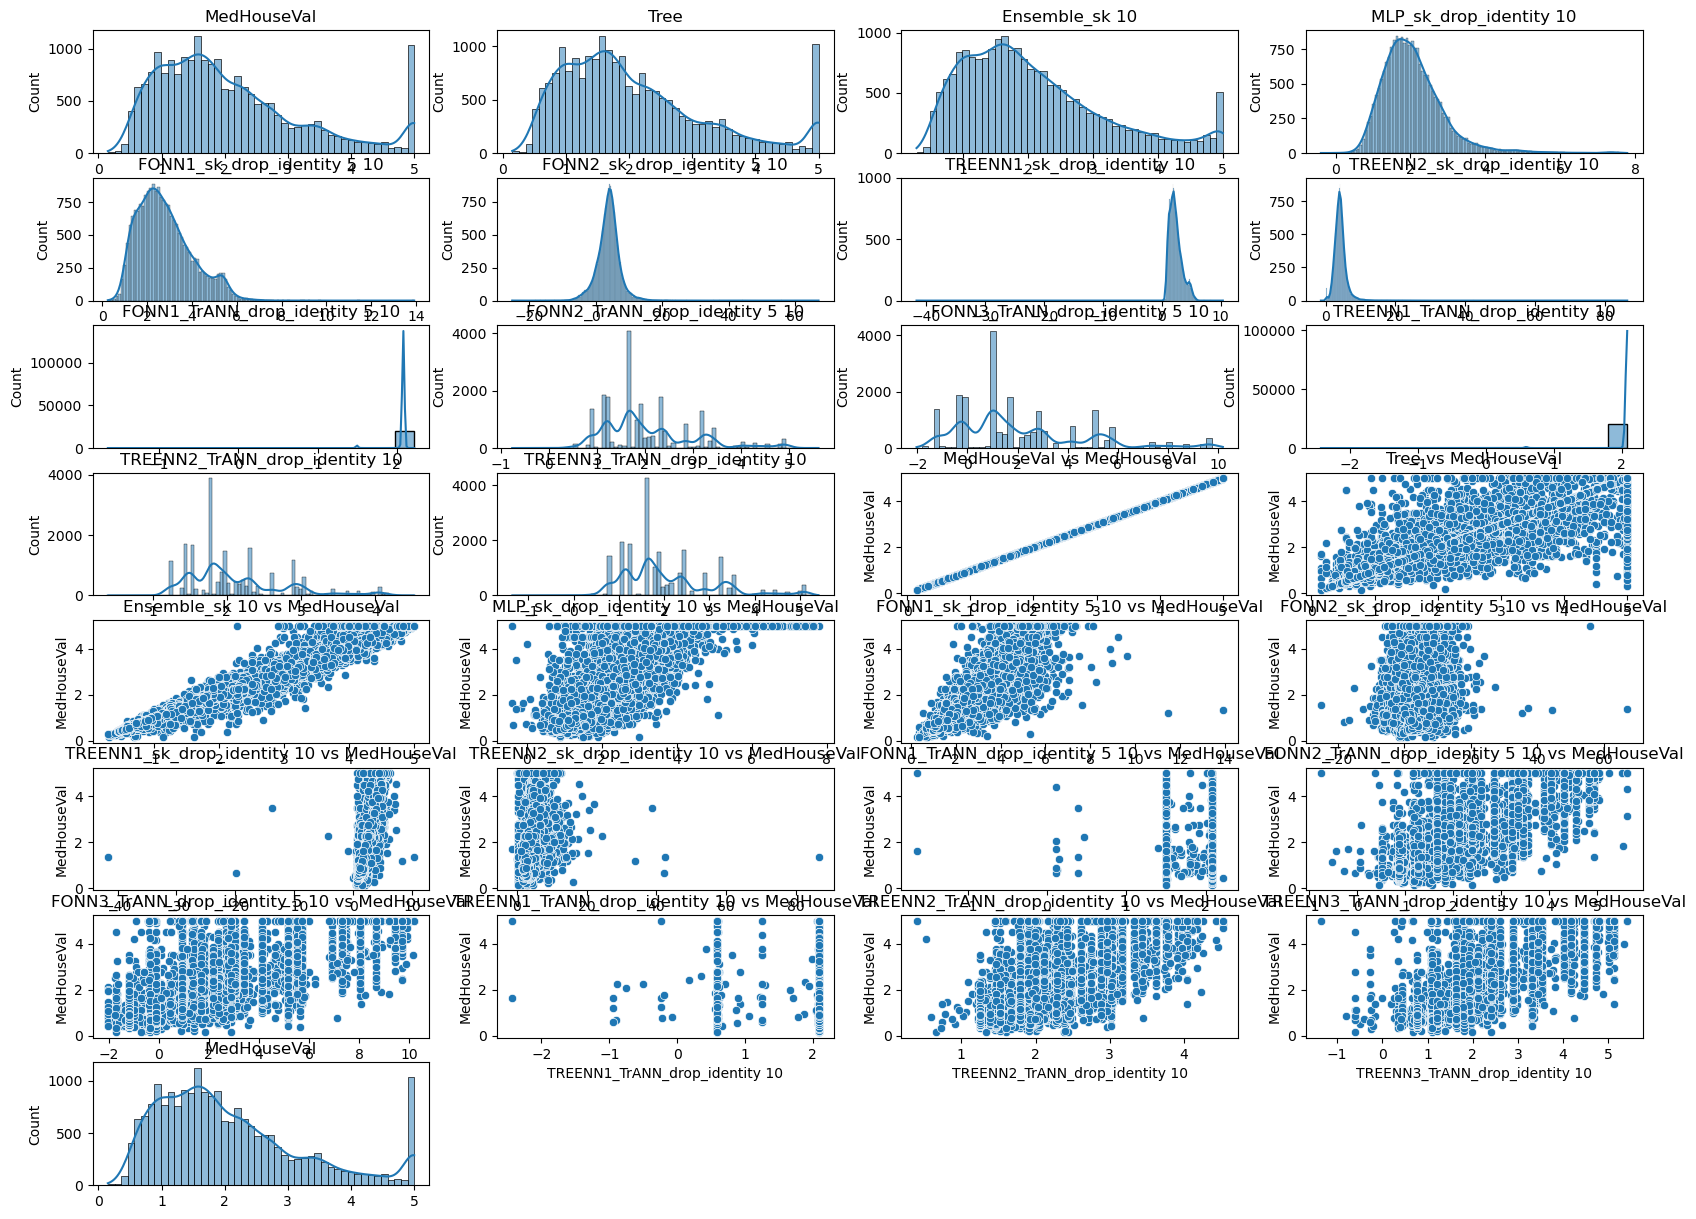

In [18]:
# Plot Predictions
fig = plot_data(predictions, y)
fig.savefig(f"{output_folder}/predictions.png")

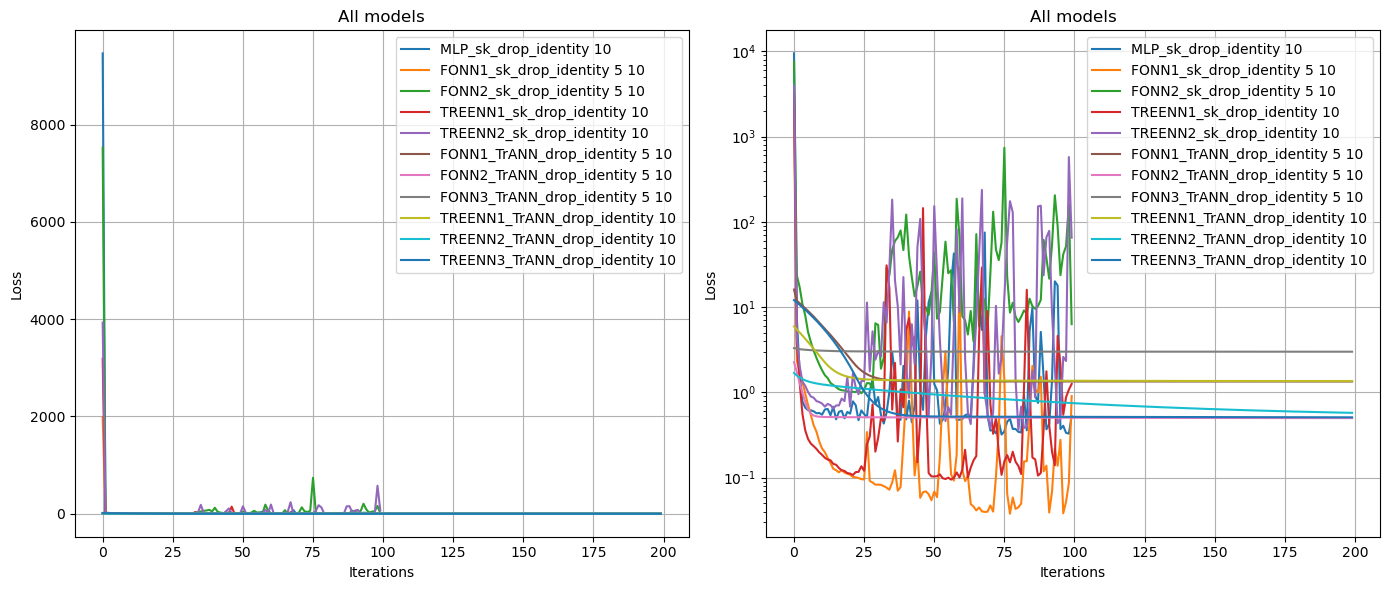

In [19]:
# Plot all models

def plot_loss(model, ax1, ax2, label):
    ax1.plot(model.loss_curve_, label=label)
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Loss")
    ax1.grid(True)

    ax2.plot(model.loss_curve_, label=label)
    ax2.set_yscale("log")
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel("Loss")
    ax2.grid(True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

for model_name, model in models.items():
    if hasattr(model.best_estimator_["model"], "loss_curve_"):
        plot_loss(model.best_estimator_["model"], ax1, ax2, label=model_name)

ax1.set_xlabel("Iterations")
ax1.set_ylabel("Loss")
ax1.set_title("All models")
ax1.legend()
ax1.grid(True)

ax2.set_yscale("log")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Loss")
ax2.set_title("All models")
ax2.legend()
ax2.grid(True)

fig.tight_layout()
fig.savefig(f"{output_folder}/models/models.png")
fig.show()

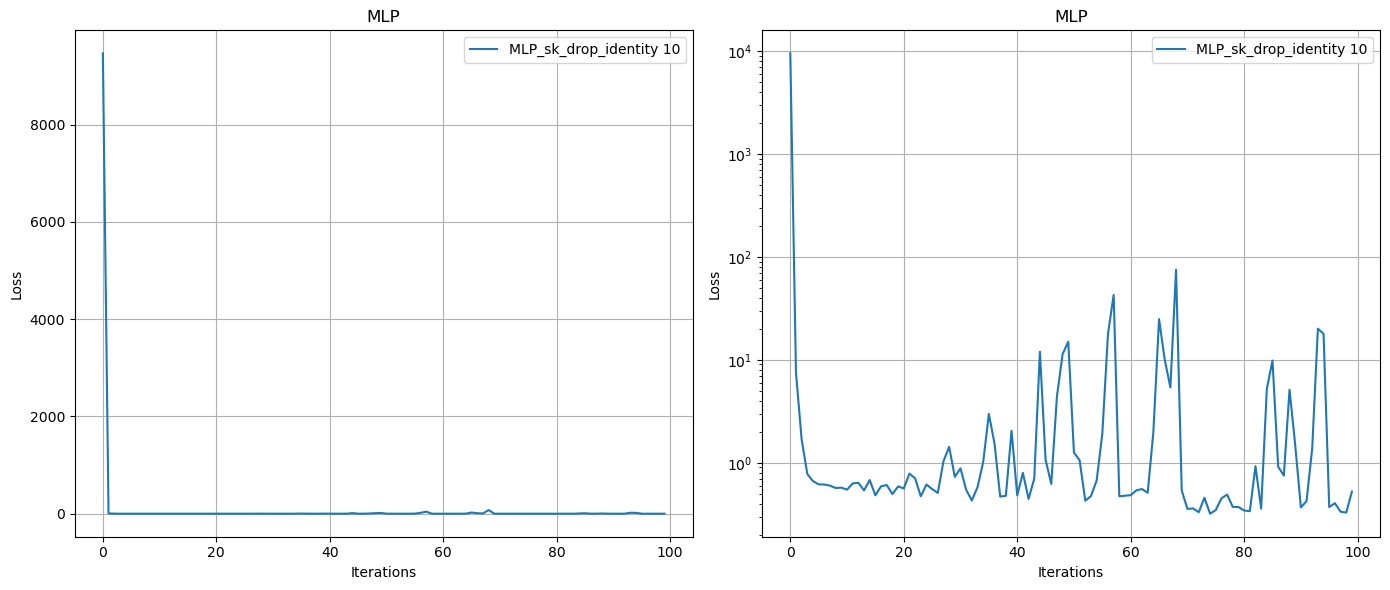

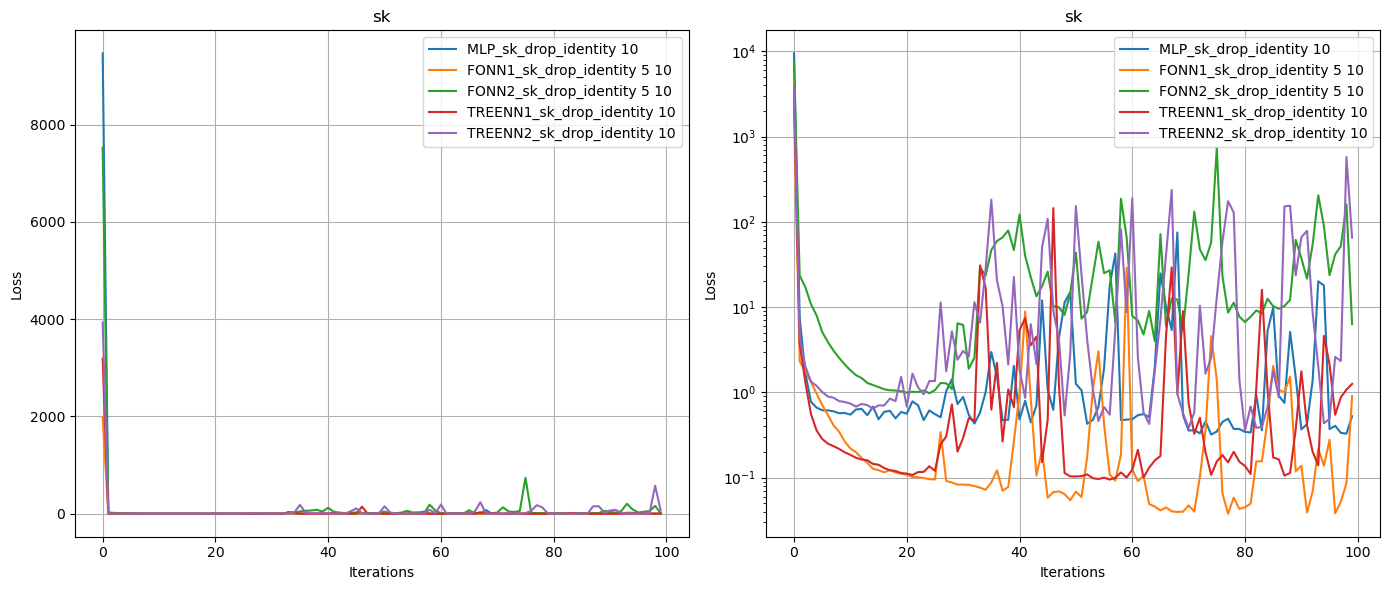

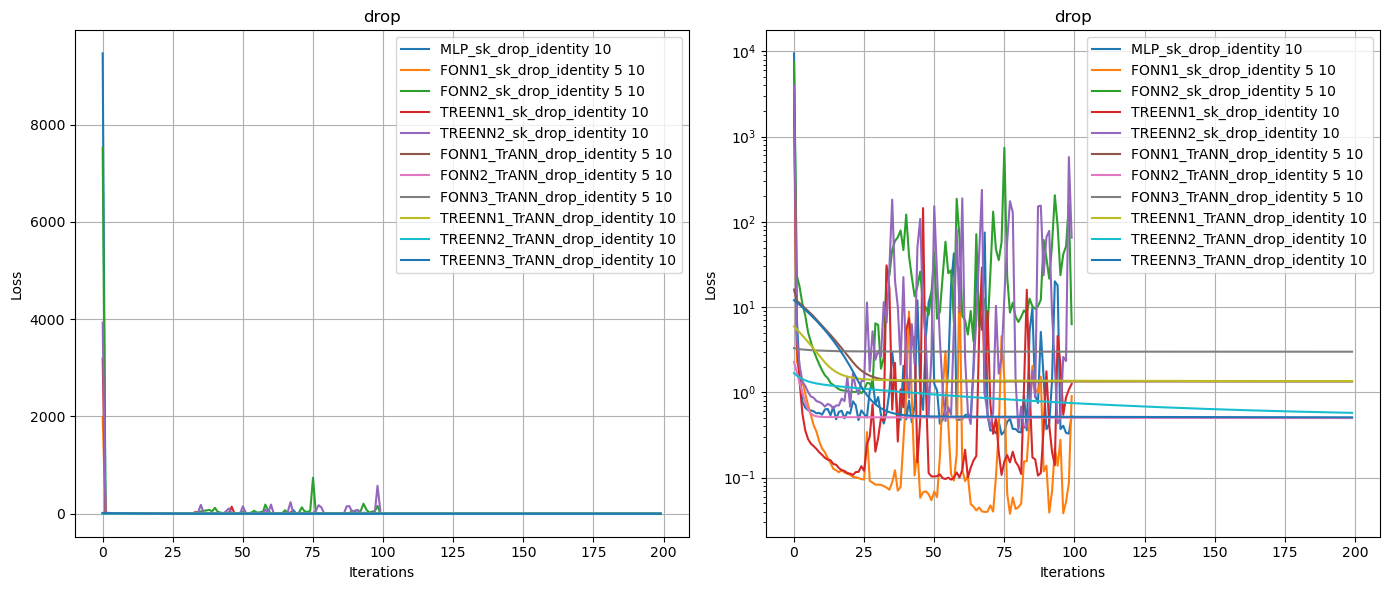

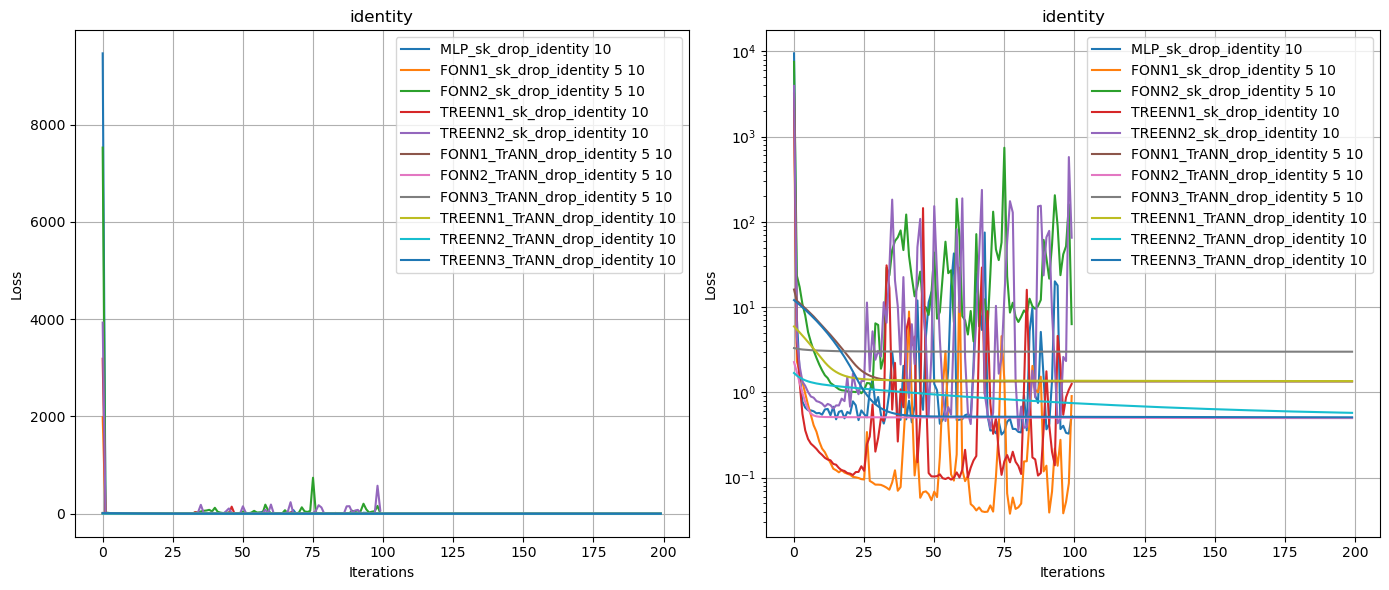

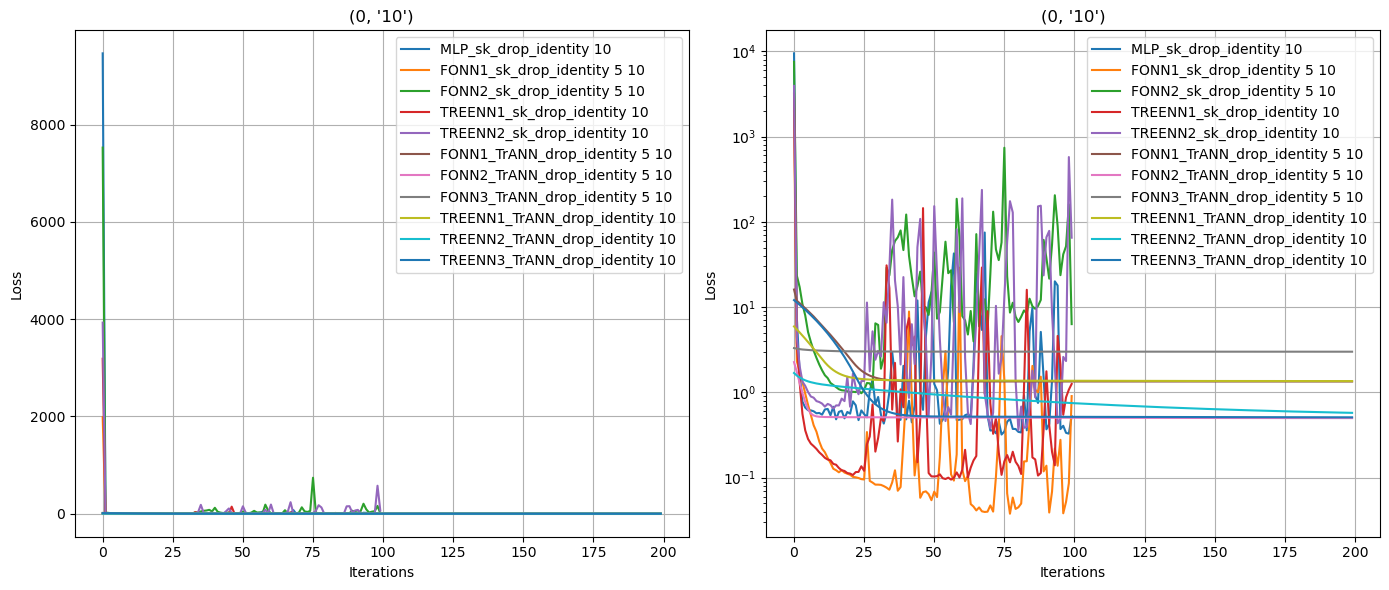

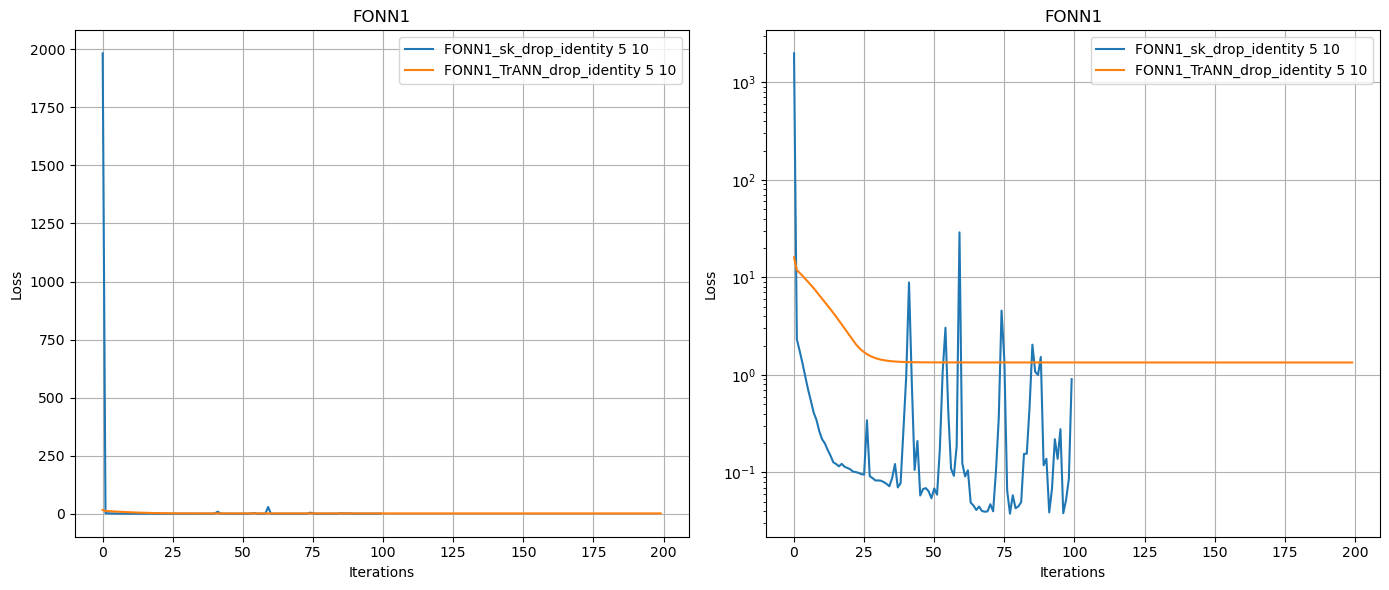

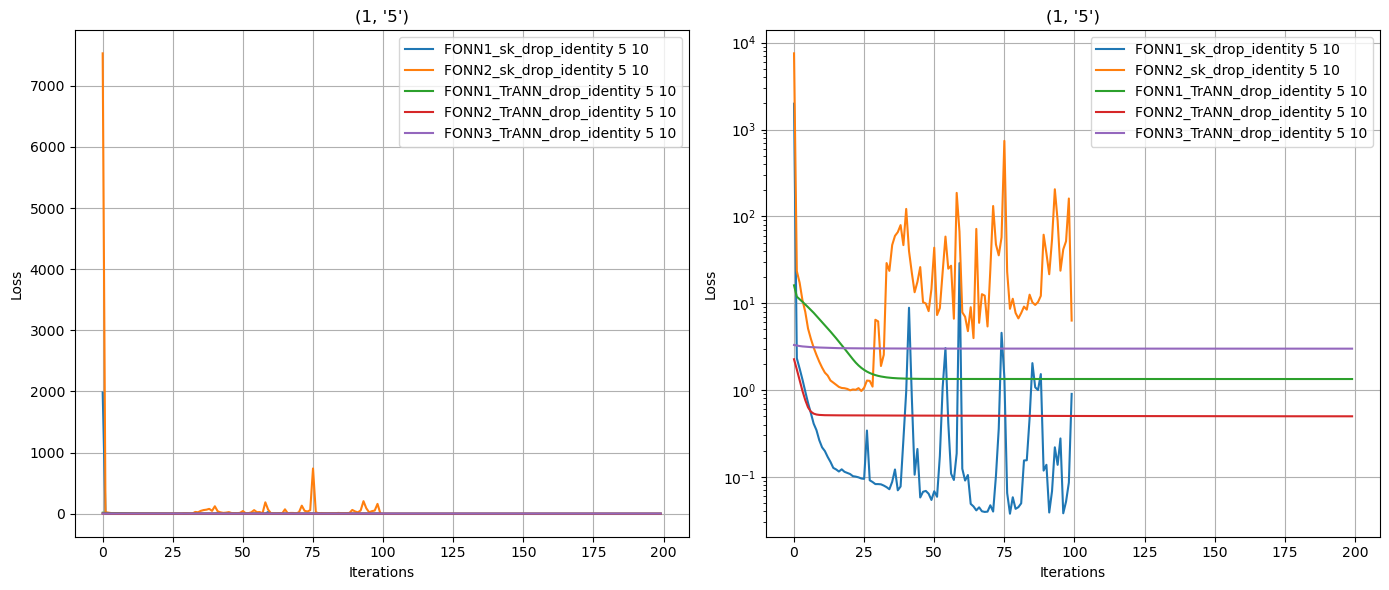

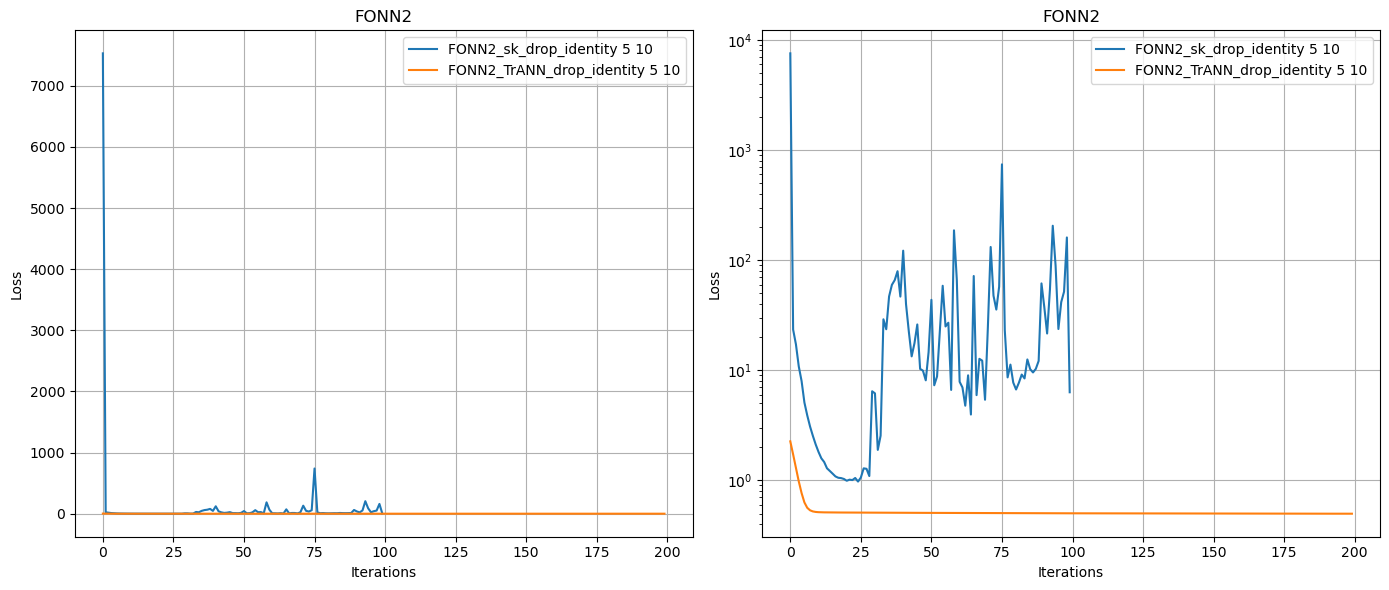

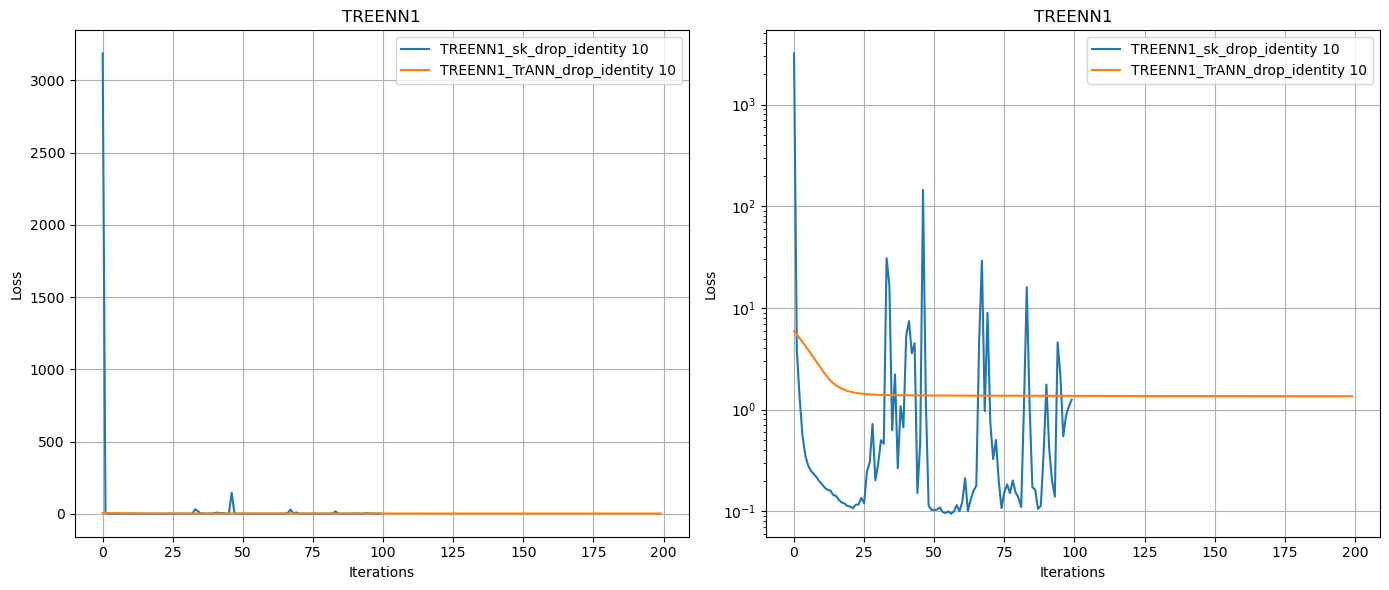

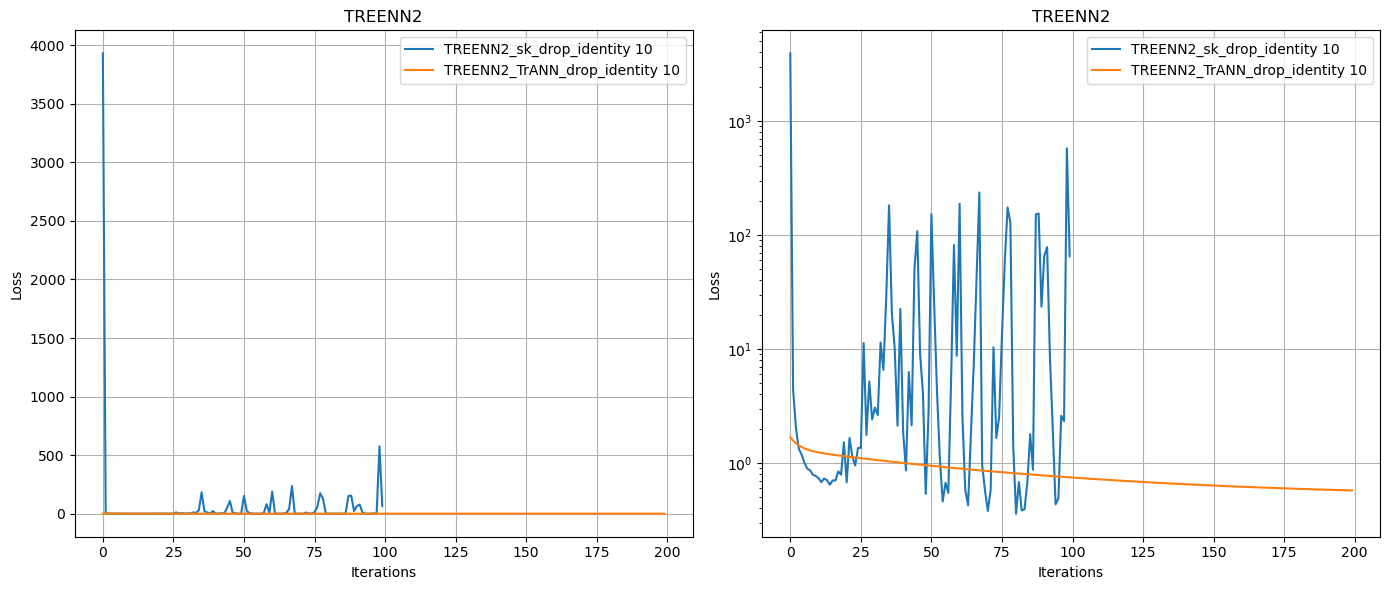

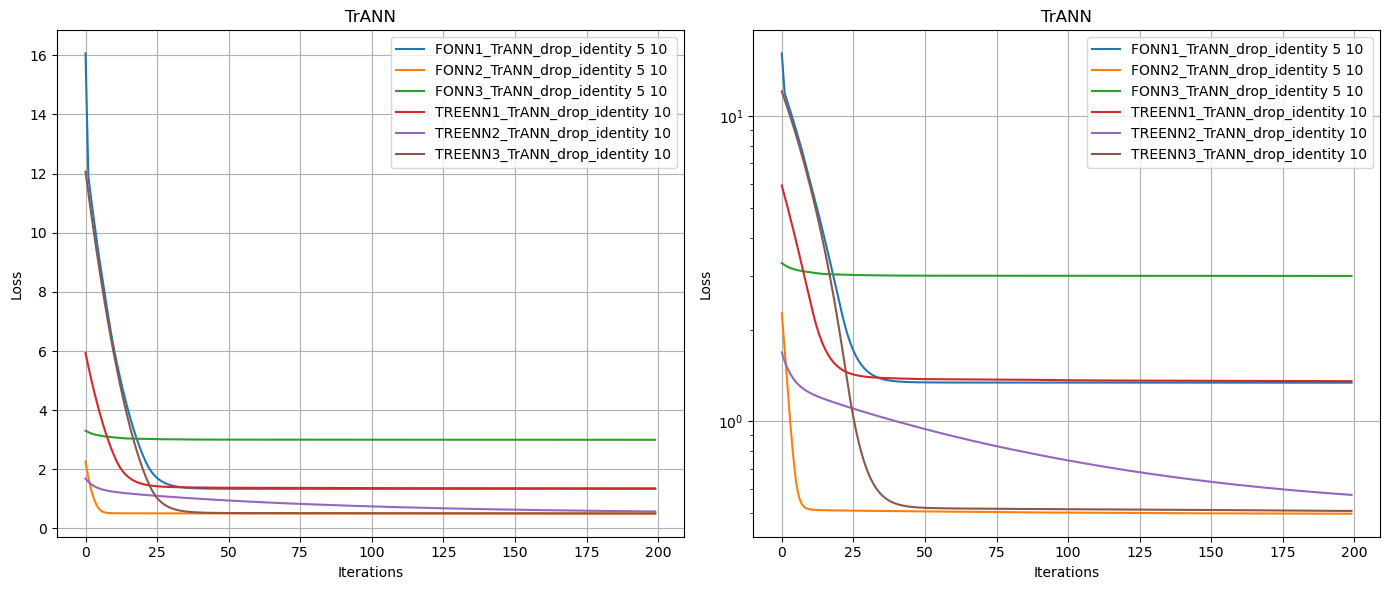

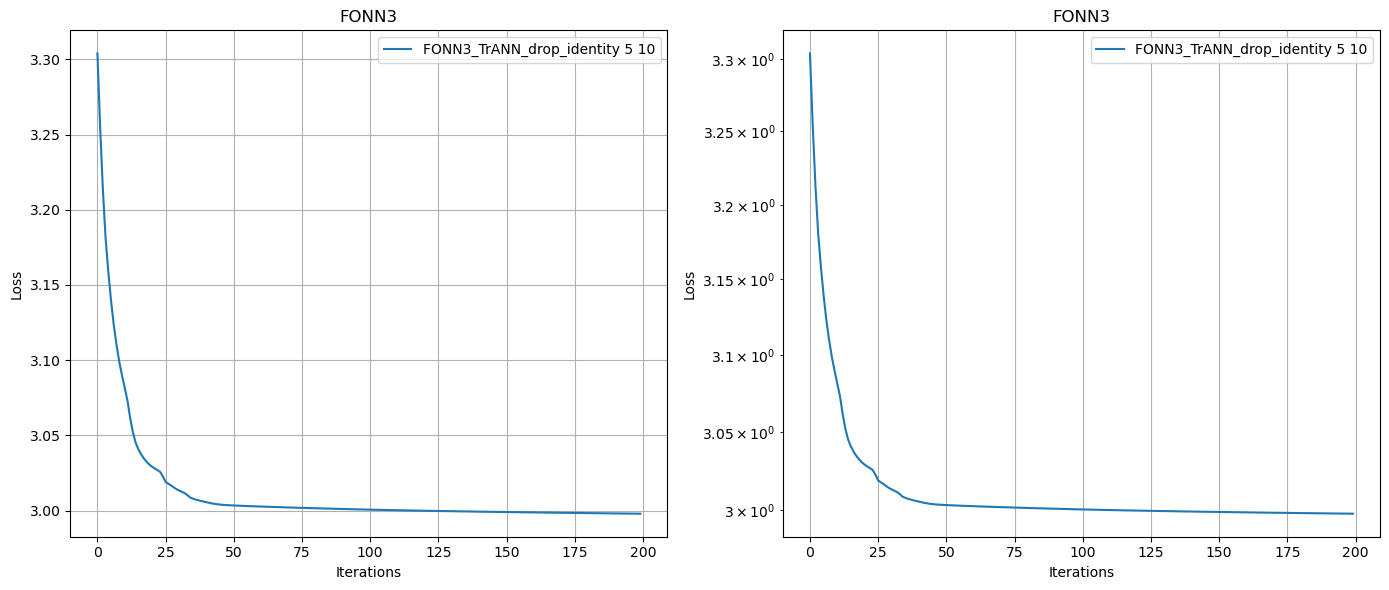

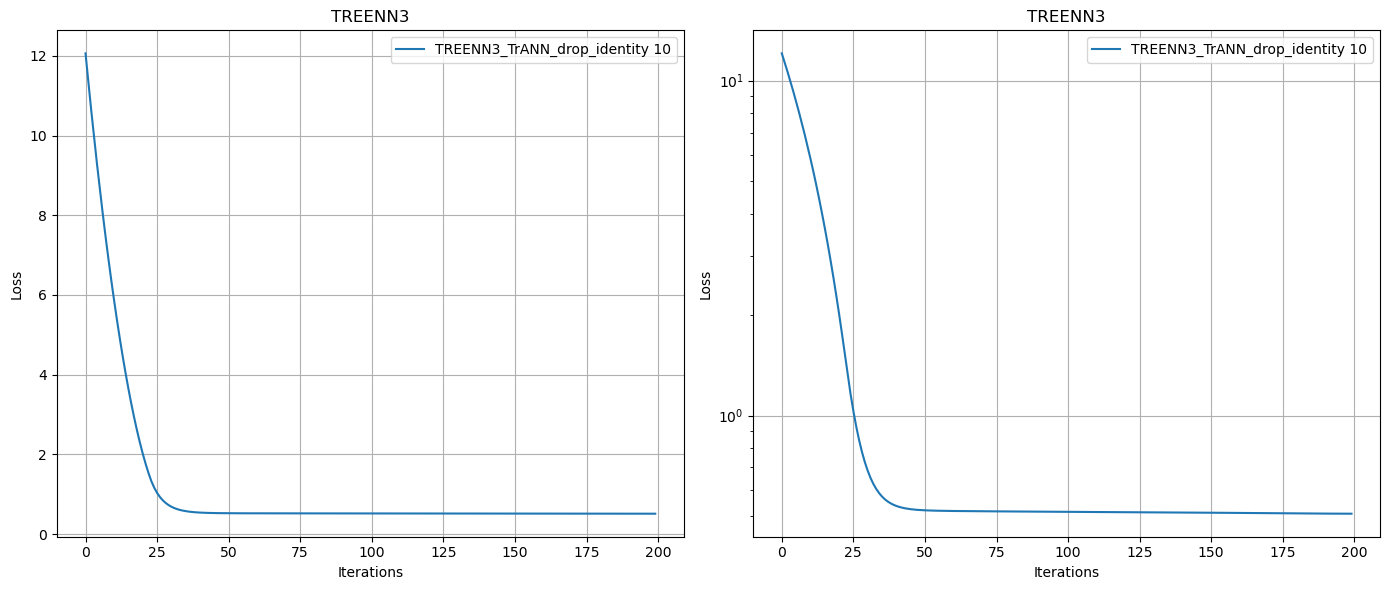

In [20]:
# Plot model groups

plot_groups = {}
for model_name, model in models.items():
    if hasattr(model.best_estimator_["model"], "loss_curve_"):
        keys = model_name.split(" ")[0].split("_") + list(enumerate(model_name.split(" ")[-1:0:-1]))
        for key in keys:
            if key not in plot_groups:
                plot_groups[key] = plt.subplots(1, 2, figsize=(14, 6))
            fig, (ax1, ax2) = plot_groups[key]
            plot_loss(model.best_estimator_["model"], ax1, ax2, model_name)

for group, plot in plot_groups.items():
    fig, (ax1, ax2) = plot
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Loss")
    ax1.set_title(group)
    ax1.legend()
    ax1.grid(True)

    ax2.set_yscale("log")
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel("Loss")
    ax2.set_title(group)
    ax2.legend()
    ax2.grid(True)

    fig.tight_layout()
    fig.savefig(f"{output_folder}/models/group_{group}.png")
    fig.show()

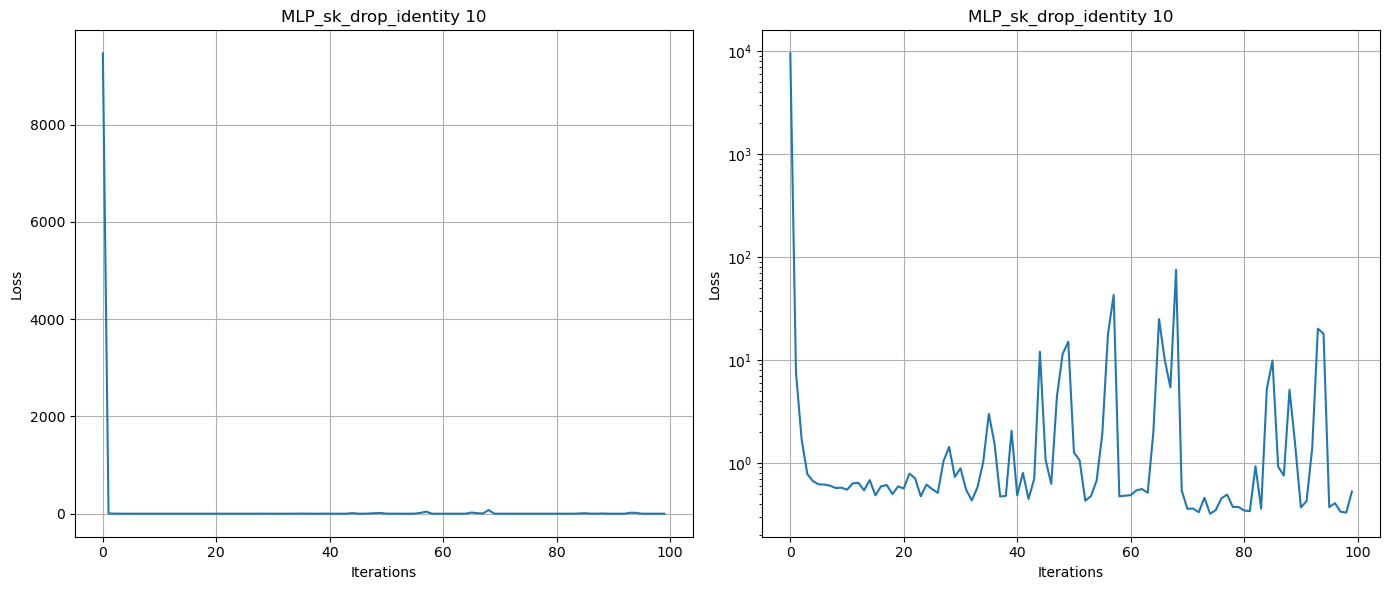

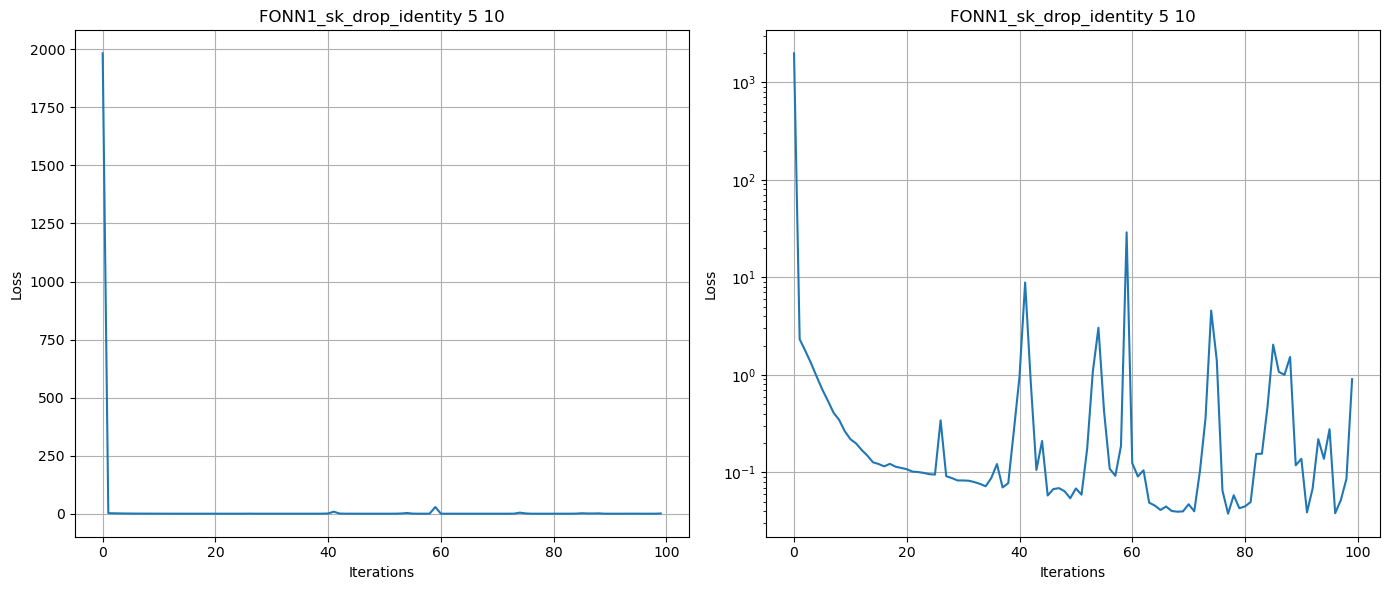

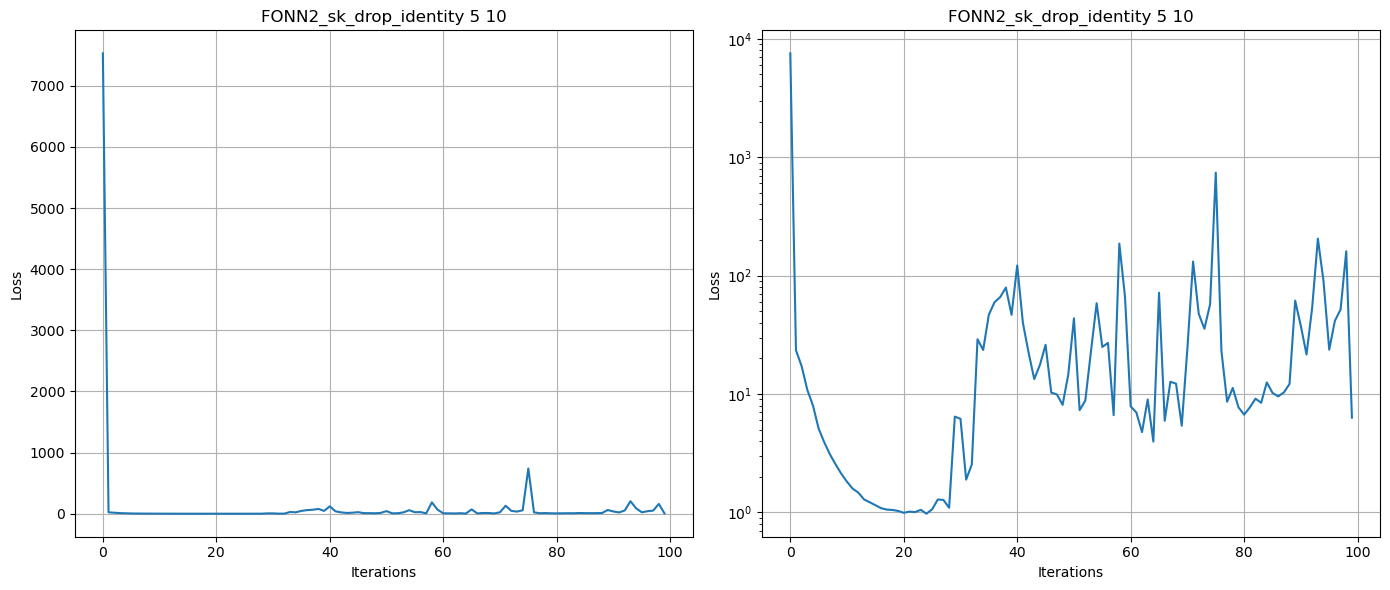

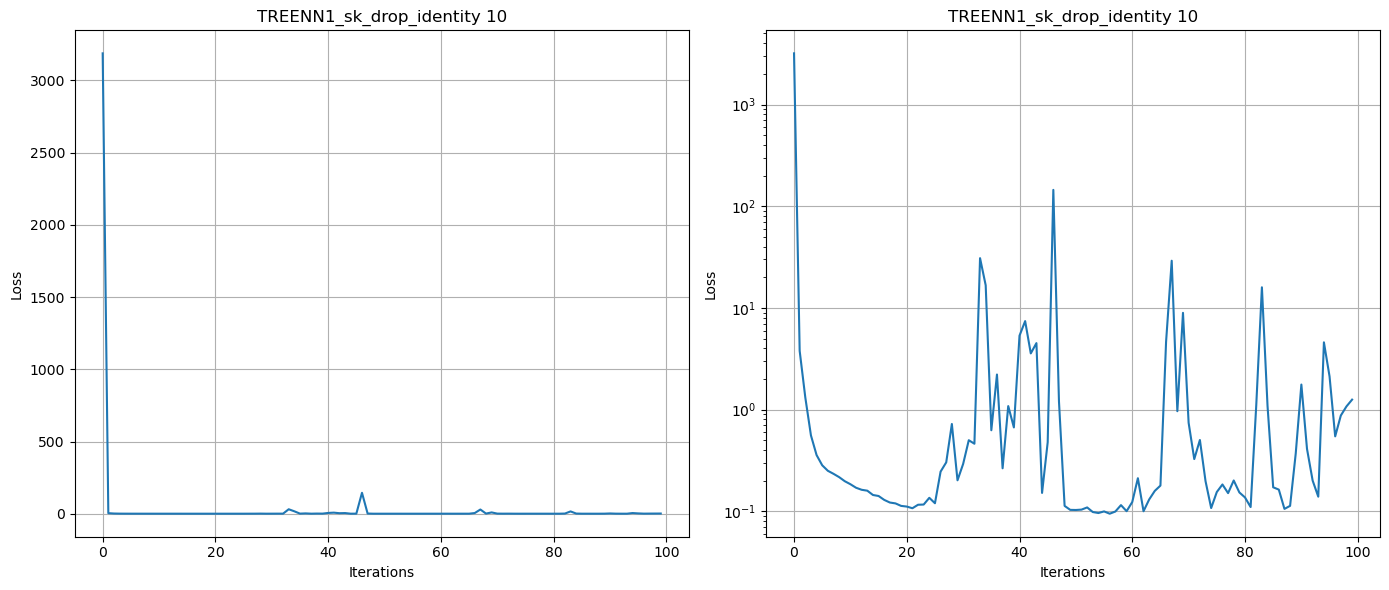

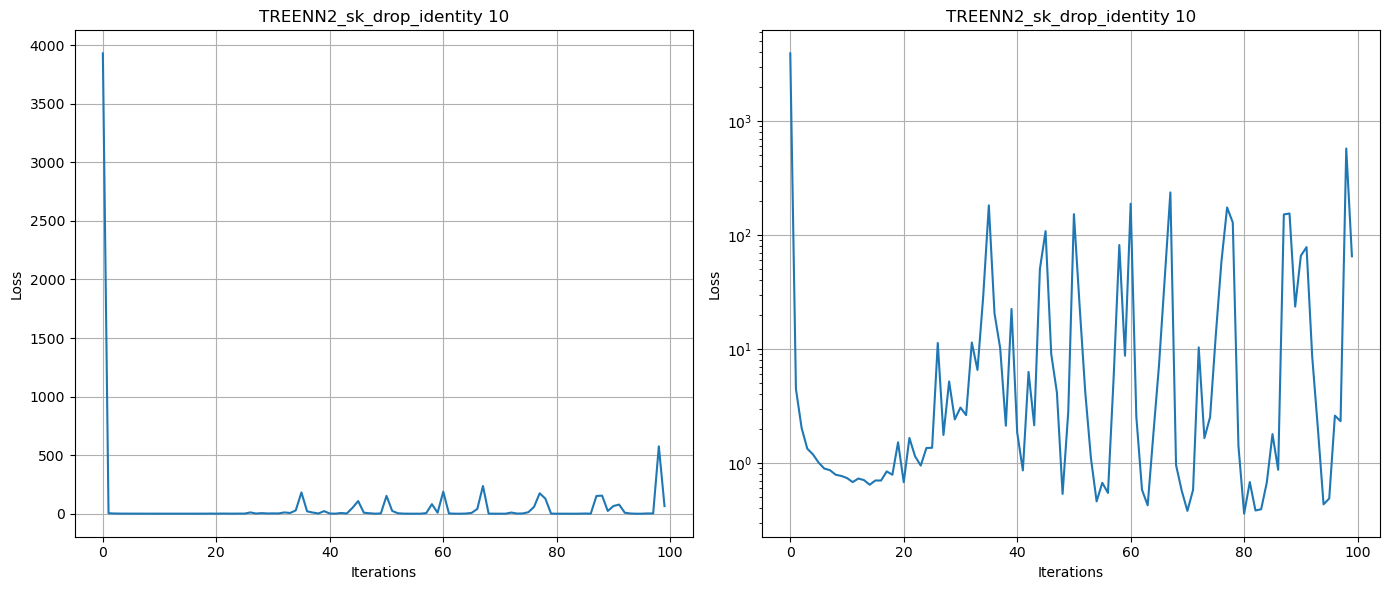

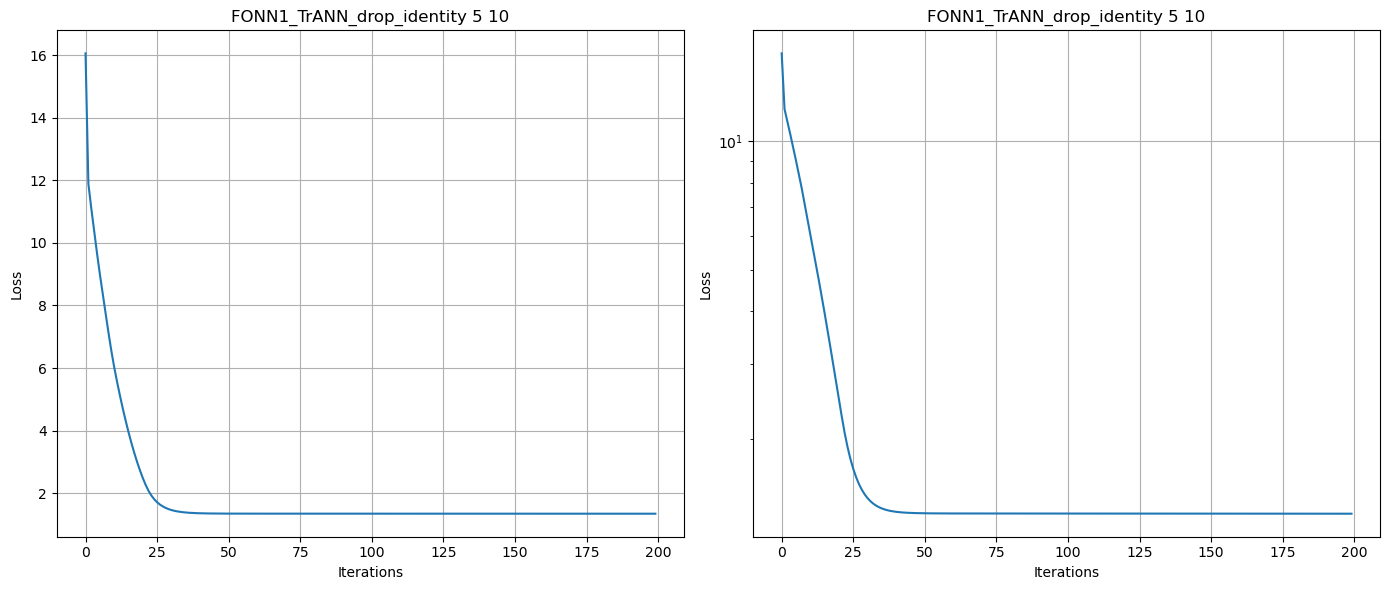

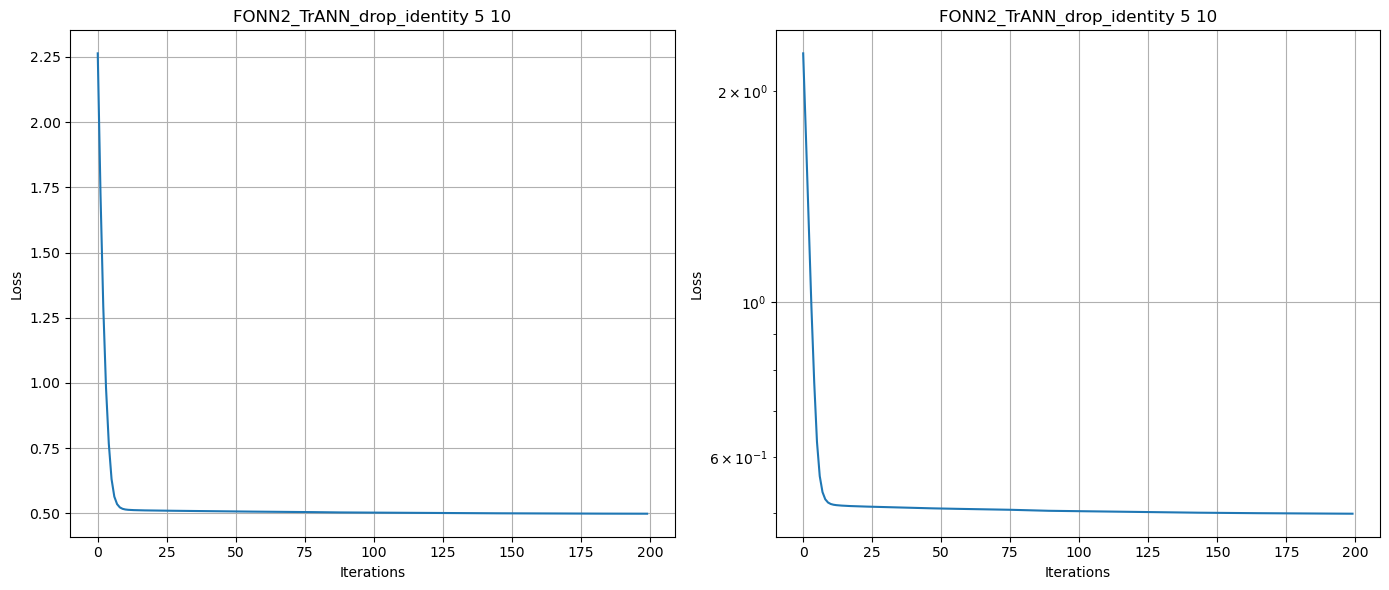

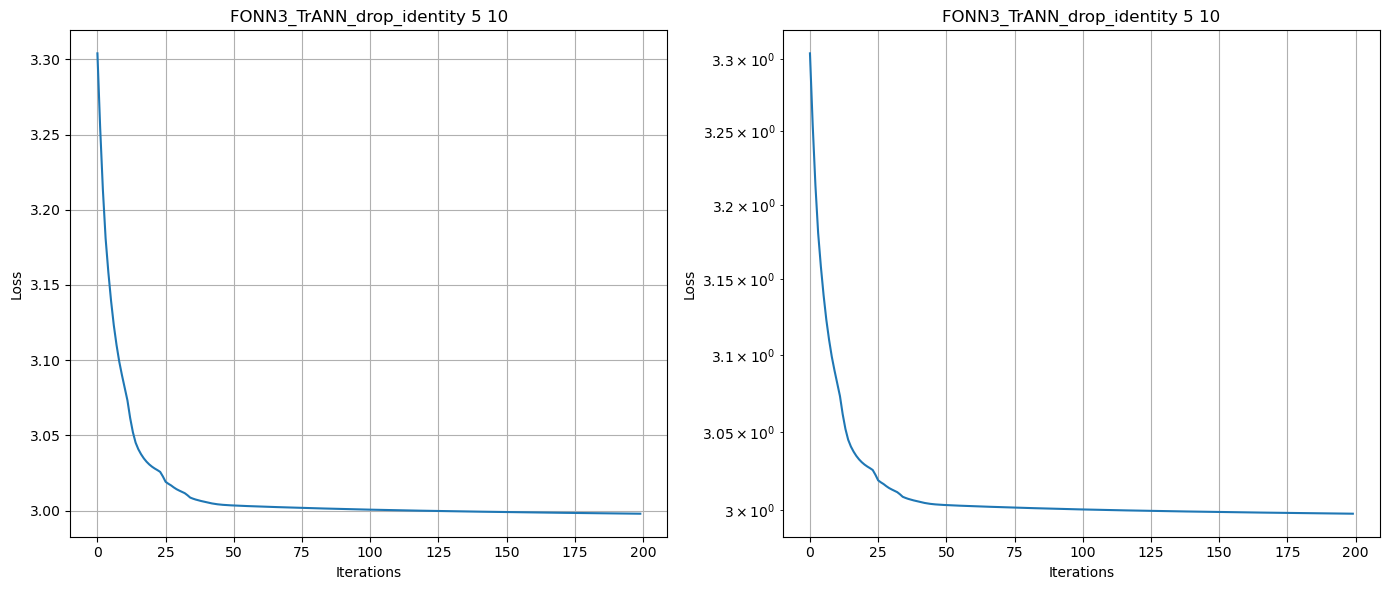

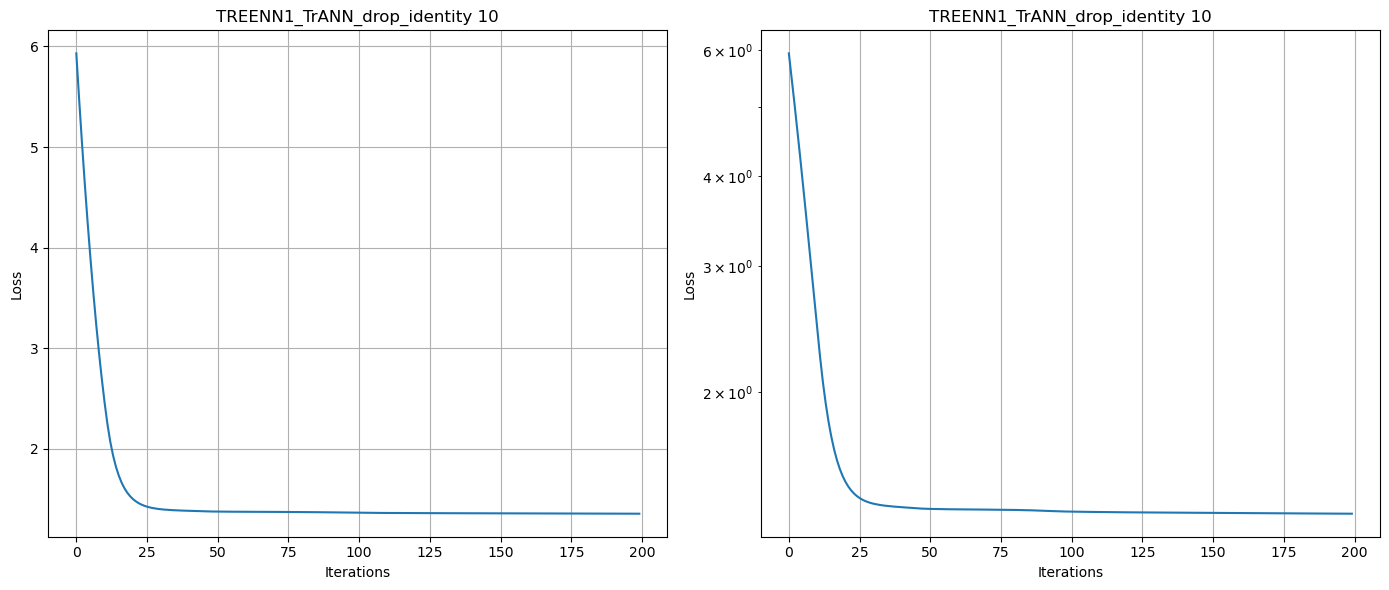

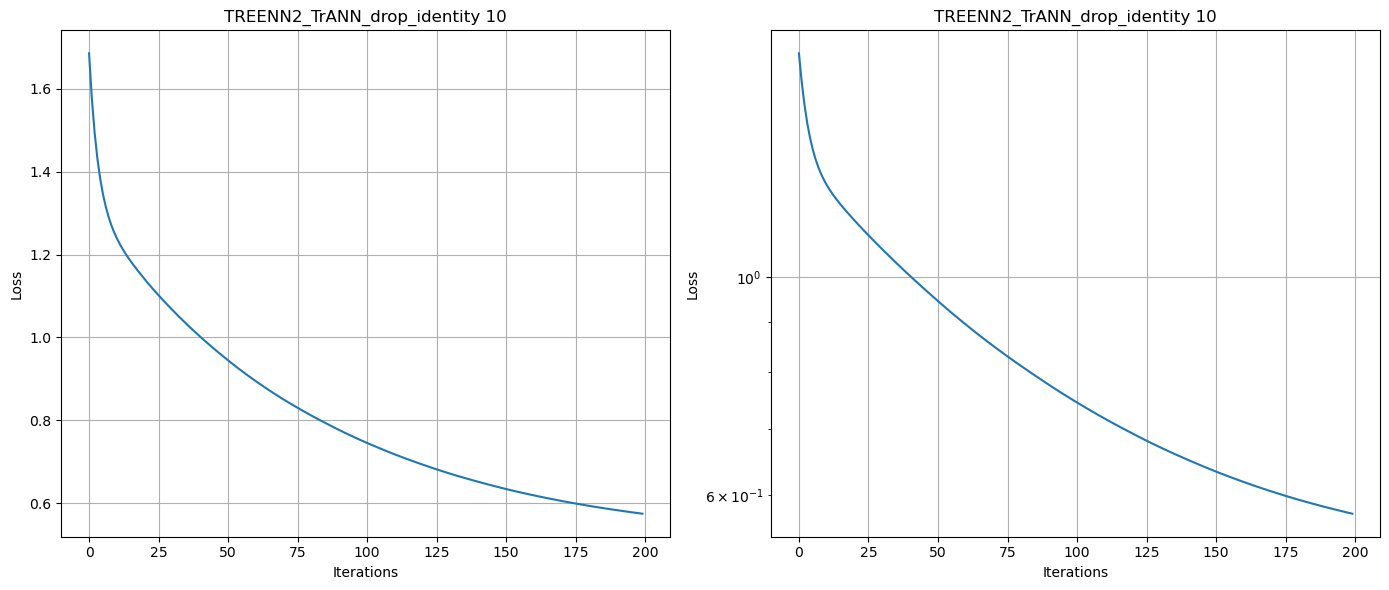

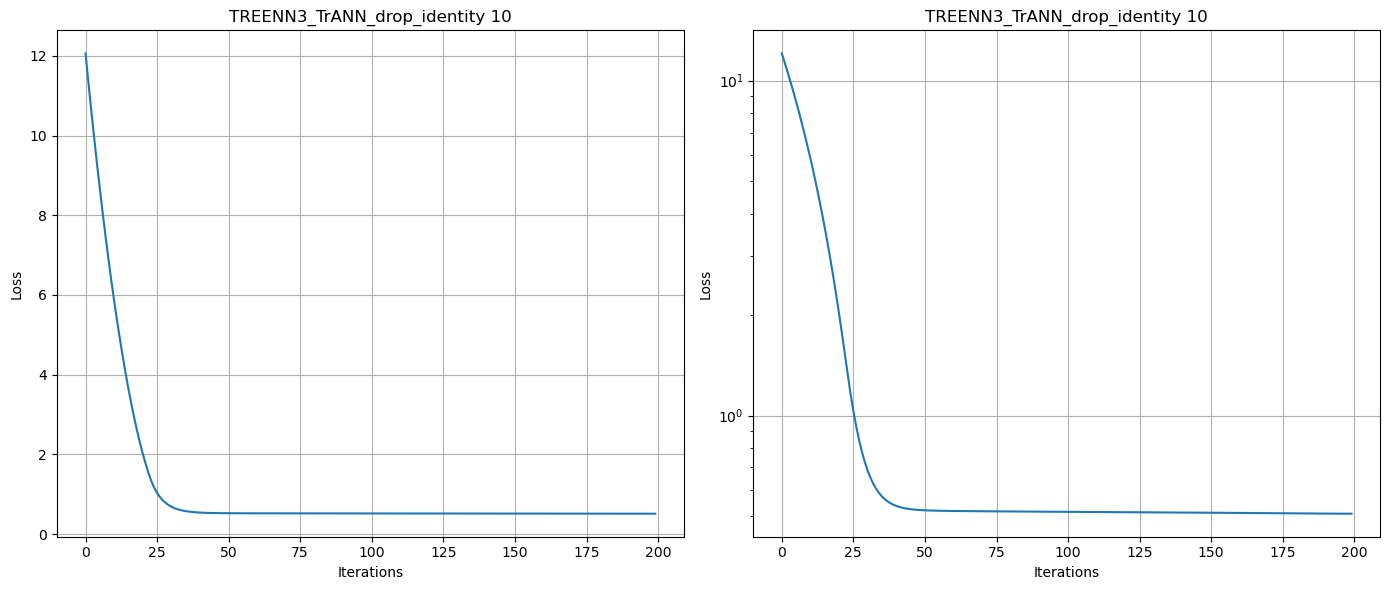

In [21]:
# Plot individual models

for model_name, model in models.items():
    if hasattr(model.best_estimator_["model"], "loss_curve_"):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        plot_loss(model.best_estimator_["model"], ax1, ax2, model_name)
        ax1.set_title(model_name)
        ax2.set_title(model_name)
        fig.tight_layout()
        fig.savefig(f"{output_folder}/models/{model_name}.png")
        fig.show()